<a href="https://colab.research.google.com/github/dhivyasreedhar/Music-Instrument-Recognition/blob/main/InstrumentClassificationknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import librosa
import os,fnmatch
import numpy as np
import pandas as pd

import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [11]:
# Get files in data path
path='/content/drive/MyDrive/Dataset'
# Get Audio Files
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.mp3'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),path))

found 10566 audio files in /content/drive/MyDrive/Dataset


In [14]:
# Get Labels
labels =[]
classes=['french_horn','trombone','trumpet', 'banjo','cello','double bass','guitar','mandolin','viola','violin','bass clarinet','bassoon','clarinet','flute','saxophone']
color_dict={'french_horn':'blue', 'trombone':'red', 'trumpet':'green', 'banjo':'black', 'cello':'magenta', 'double bass':'yellow','guitar':'orange','mandolin':'brown','viola':'grey','violin':'chrome','bass clarinet':'pink','bassoon':'violet','clarinet':'white','flute':'teal','saxophone':'maroon'}
color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

In [15]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

15 classes: banjo, bass clarinet, bassoon, cello, clarinet, double bass, flute, guitar, mandolin, other, saxophone, trombone, trumpet, viola, violin


In [16]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier

In [17]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

In [18]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Cs5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_F4_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Gs4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Gs3_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_A4_very-long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_D4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_E4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_B5_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_A6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_G3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 11 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_A3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 12 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Ds5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 13 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Fs6_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 14 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Cs5_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 15 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Ds5_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 16 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_B3_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 17 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_C4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 18 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_G4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 19 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Fs6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 20 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_E5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 21 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_E6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 22 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_As5_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 23 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_A5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 24 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_G3_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 25 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Gs3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 26 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_D5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 27 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_D5_very-long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 28 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_E6_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 29 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Ds6_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 30 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_F4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 31 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_A4_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 32 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_C6_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 33 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_G3_very-long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 34 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_As3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 35 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_C4_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 36 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Gs4_very-long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 37 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_As3_very-long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 38 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_D4_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 39 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_C6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 40 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_G6_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 41 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_C5_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 42 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_G6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 43 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_F5_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 44 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Fs5_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 45 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_C5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 46 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_B4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 47 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_G5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 48 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Ds6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 49 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Gs5_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 50 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_A5_very-long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 51 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_A6_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 52 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_D6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 53 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_B5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 54 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Cs6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 55 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Cs4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 56 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_A3_very-long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 57 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Gs6_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 58 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_B4_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 59 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Ds4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 60 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_E5_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 61 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Fs4_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 62 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Fs4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 63 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_As5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 64 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_G5_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 65 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Cs4_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 66 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_As4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 67 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Fs5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 68 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Ds4_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 69 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Gs5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 70 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_F6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 71 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_F5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 72 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_B3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 73 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_A4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 74 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_As4_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 75 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Gs6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 76 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_Cs6_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 77 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_D6_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 78 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_G4_very-long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 79 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_E4_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 80 of 10566 = /content/drive/MyDrive/Dataset/Strings/mandolin/mandolin_F6_very-long_piano_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 81 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 82 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 83 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 84 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 85 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 86 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_phrase_forte_pizz-quasi-guitar.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 87 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 88 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 89 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 90 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 91 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 92 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 93 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 94 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 95 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 96 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 97 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 98 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 99 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 100 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 101 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 102 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_phrase_fortissimo_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 103 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 104 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 105 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 106 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 107 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 108 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 109 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 110 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 111 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 112 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 113 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 114 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 115 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 116 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 117 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 118 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 119 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 120 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_phrase_piano_arco-punta-d'arco.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 121 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 122 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 123 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 124 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 125 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_very-long_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 126 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 127 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 128 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 129 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 130 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 131 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_15_mezzo-piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 132 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 133 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 134 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 135 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 136 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 137 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 138 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 139 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 140 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_long_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 141 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 142 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 143 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 144 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 145 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 146 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 147 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 148 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 149 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 150 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 151 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 152 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 153 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 154 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 155 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 156 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 157 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 158 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 159 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 160 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 161 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 162 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 163 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 164 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 165 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 166 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 167 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 168 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 169 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 170 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 171 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 172 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_phrase_mezzo-piano_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 173 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 174 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 175 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_mezzo-piano_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 176 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 177 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 178 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 179 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 180 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 181 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 182 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 183 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 184 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 185 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_025_mezzo-piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 186 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 187 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 188 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 189 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 190 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 191 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 192 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 193 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 194 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 195 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 196 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 197 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 198 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 199 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_05_mezzo-forte_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 200 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 201 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 202 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 203 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 204 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 205 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 206 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 207 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 208 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 209 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 210 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 211 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 212 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_05_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 213 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 214 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 215 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 216 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 217 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 218 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 219 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 220 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 221 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 222 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 223 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 224 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 225 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 226 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 227 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 228 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 229 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 230 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 231 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 232 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 233 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 234 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 235 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_phrase_piano_arco-punta-d'arco.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 236 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 237 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 238 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_mezzo-piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 239 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 240 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_phrase_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 241 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 242 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 243 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 244 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 245 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 246 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 247 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 248 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 249 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 250 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 251 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 252 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 253 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 254 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 255 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 256 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 257 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 258 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 259 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 260 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 261 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 262 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 263 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 264 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_phrase_pianissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 265 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 266 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 267 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 268 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 269 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 270 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_phrase_piano_arco-punta-d'arco.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 271 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 272 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 273 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 274 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 275 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 276 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 277 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 278 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 279 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 280 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 281 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 282 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 283 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 284 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 285 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 286 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 287 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 288 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 289 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 290 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 291 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 292 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 293 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 294 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 295 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 296 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 297 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 298 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 299 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 300 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 301 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 302 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 303 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 304 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 305 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 306 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 307 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 308 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 309 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 310 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 311 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 312 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 313 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 314 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 315 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 316 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 317 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 318 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 319 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 320 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 321 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 322 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 323 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 324 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 325 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 326 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 327 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 328 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 329 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 330 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 331 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_phrase_mezzo-piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 332 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 333 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 334 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 335 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 336 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 337 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 338 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 339 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 340 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 341 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 342 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 343 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 344 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 345 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 346 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 347 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 348 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 349 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 350 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 351 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 352 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 353 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 354 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 355 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 356 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_phrase_mezzo-piano_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 357 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 358 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 359 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 360 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 361 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 362 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 363 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 364 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 365 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 366 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 367 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 368 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 369 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 370 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 371 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 372 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 373 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 374 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 375 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 376 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 377 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 378 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 379 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 380 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 381 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 382 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 383 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 384 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 385 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 386 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 387 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 388 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 389 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 390 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_long_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 391 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_long_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 392 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 393 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 394 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 395 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 396 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 397 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 398 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 399 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 400 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 401 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 402 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 403 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 404 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 405 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 406 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 407 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 408 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A7_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 409 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 410 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 411 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 412 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 413 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 414 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 415 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 416 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 417 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 418 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 419 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 420 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 421 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 422 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 423 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 424 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 425 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 426 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 427 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 428 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 429 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 430 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 431 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 432 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 433 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_05_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 434 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 435 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 436 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 437 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 438 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 439 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 440 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_phrase_forte_harmonic-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 441 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 442 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 443 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_mezzo-piano_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 444 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 445 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 446 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 447 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 448 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 449 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 450 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 451 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 452 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 453 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 454 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 455 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 456 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 457 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 458 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 459 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 460 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 461 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 462 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 463 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 464 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 465 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 466 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 467 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 468 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 469 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 470 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 471 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 472 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 473 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 474 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 475 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 476 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 477 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 478 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 479 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 480 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 481 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 482 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 483 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 484 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 485 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 486 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_05_mezzo-forte_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 487 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 488 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 489 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 490 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 491 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 492 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 493 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 494 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 495 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_025_mezzo-piano_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 496 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_mezzo-piano_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 497 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 498 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 499 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 500 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 501 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 502 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 503 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 504 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 505 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 506 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_very-long_crescendo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 507 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 508 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 509 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 510 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 511 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 512 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_phrase_pianissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 513 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 514 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 515 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 516 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_phrase_mezzo-piano_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 517 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 518 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 519 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_very-long_decrescendo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 520 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_phrase_piano_arco-punta-d'arco.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 521 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 522 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 523 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 524 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 525 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 526 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 527 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 528 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 529 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 530 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 531 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_phrase_forte_harmonic-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 532 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 533 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 534 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_phrase_mezzo-piano_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 535 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 536 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 537 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 538 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 539 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_mezzo-piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 540 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 541 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 542 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_very-long_crescendo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 543 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 544 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 545 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 546 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 547 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 548 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 549 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 550 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 551 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 552 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 553 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 554 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 555 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 556 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 557 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 558 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 559 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 560 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 561 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 562 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 563 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 564 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 565 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 566 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 567 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 568 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 569 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 570 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 571 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 572 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 573 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 574 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 575 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 576 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 577 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 578 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 579 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 580 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 581 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 582 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 583 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 584 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 585 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 586 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 587 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 588 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 589 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 590 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 591 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_very-long_pianissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 592 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 593 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 594 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 595 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 596 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 597 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 598 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_long_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 599 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 600 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 601 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 602 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 603 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 604 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 605 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_pianissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 606 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 607 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 608 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 609 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 610 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B7_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 611 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 612 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E8_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 613 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 614 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_pianissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 615 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 616 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 617 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 618 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 619 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 620 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 621 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 622 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 623 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 624 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 625 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 626 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 627 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 628 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 629 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 630 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 631 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 632 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 633 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 634 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 635 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 636 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 637 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 638 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As7_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 639 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 640 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 641 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 642 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 643 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 644 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 645 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 646 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_phrase_piano_arco-punta-d'arco.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 647 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_phrase_mezzo-piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 648 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 649 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 650 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 651 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 652 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 653 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 654 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 655 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 656 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 657 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 658 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 659 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 660 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 661 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 662 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 663 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 664 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 665 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_very-long_pianissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 666 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 667 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 668 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_phrase_piano_arco-punta-d'arco.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 669 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 670 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 671 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 672 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 673 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 674 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 675 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 676 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_very-long_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 677 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 678 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 679 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 680 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 681 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 682 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 683 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 684 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_mezzo-forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 685 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 686 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 687 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 688 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 689 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 690 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 691 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 692 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 693 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 694 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 695 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_025_mezzo-piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 696 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 697 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 698 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 699 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 700 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 701 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 702 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 703 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 704 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 705 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 706 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 707 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 708 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 709 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 710 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 711 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 712 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_phrase_piano_arco-punta-d'arco.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 713 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 714 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 715 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 716 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 717 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 718 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 719 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 720 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 721 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_phrase_mezzo-piano_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 722 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 723 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 724 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 725 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_phrase_mezzo-piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 726 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 727 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 728 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 729 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 730 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 731 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 732 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 733 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 734 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 735 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 736 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 737 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 738 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 739 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 740 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 741 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 742 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 743 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 744 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 745 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_phrase_forte_harmonic-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 746 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 747 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 748 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 749 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 750 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 751 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B7_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 752 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 753 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 754 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 755 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 756 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 757 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 758 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 759 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_pianissimo_pizz-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 760 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 761 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 762 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 763 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_mezzo-piano_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 764 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 765 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 766 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 767 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 768 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 769 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 770 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 771 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 772 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 773 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_long_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 774 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 775 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 776 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 777 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 778 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 779 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 780 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 781 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 782 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 783 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 784 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 785 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 786 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 787 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 788 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 789 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 790 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 791 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_very-long_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 792 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 793 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_phrase_pianissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 794 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 795 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 796 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 797 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 798 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 799 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 800 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 801 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 802 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 803 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 804 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 805 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 806 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 807 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 808 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 809 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 810 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 811 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 812 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 813 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 814 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 815 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 816 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 817 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 818 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 819 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 820 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 821 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 822 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 823 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 824 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 825 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 826 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 827 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 828 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 829 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 830 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_very-long_crescendo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 831 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 832 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 833 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 834 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 835 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 836 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 837 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 838 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 839 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 840 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 841 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 842 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 843 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 844 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 845 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 846 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 847 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 848 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 849 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 850 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 851 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 852 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 853 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 854 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 855 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 856 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 857 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 858 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 859 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 860 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 861 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_forte_harmonic-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 862 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 863 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_1_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 864 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 865 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 866 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 867 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 868 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 869 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_phrase_forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 870 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 871 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 872 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 873 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 874 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 875 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 876 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 877 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 878 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 879 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 880 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 881 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 882 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 883 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 884 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 885 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 886 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 887 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 888 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 889 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 890 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 891 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 892 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_mezzo-forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 893 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 894 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 895 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 896 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 897 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 898 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 899 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 900 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 901 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 902 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 903 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 904 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 905 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 906 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 907 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 908 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 909 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 910 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 911 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 912 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 913 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_1_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 914 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 915 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 916 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 917 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 918 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 919 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 920 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_very-long_pianissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 921 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 922 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 923 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 924 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 925 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 926 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 927 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 928 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_phrase_mezzo-piano_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 929 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 930 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 931 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 932 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 933 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 934 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 935 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 936 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_mezzo-piano_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 937 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 938 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 939 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 940 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 941 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 942 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 943 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 944 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 945 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 946 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_pianissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 947 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 948 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 949 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 950 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 951 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 952 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 953 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 954 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 955 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 956 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 957 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_mezzo-piano_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 958 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 959 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 960 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_mezzo-forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 961 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 962 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 963 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 964 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 965 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 966 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 967 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_phrase_mezzo-piano_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 968 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 969 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 970 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 971 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 972 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 973 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 974 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 975 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 976 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 977 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 978 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 979 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 980 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 981 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_very-long_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 982 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 983 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 984 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 985 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 986 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 987 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 988 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 989 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 990 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 991 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 992 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 993 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 994 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 995 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_025_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 996 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 997 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 998 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 999 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1000 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1001 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1002 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1003 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1004 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1005 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1006 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1007 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1008 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1009 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1010 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1011 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1012 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1013 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1014 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1015 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1016 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1017 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1018 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1019 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1020 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1021 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1022 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_long_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1023 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1024 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1025 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_mezzo-forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1026 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1027 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1028 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1029 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1030 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1031 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1032 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1033 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1034 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1035 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1036 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1037 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1038 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1039 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1040 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1041 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1042 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1043 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1044 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1045 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1046 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1047 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1048 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1049 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1050 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1051 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1052 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1053 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1054 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1055 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1056 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1057 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1058 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1059 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1060 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs7_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1061 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1062 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1063 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1064 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1065 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1066 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1067 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1068 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1069 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1070 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1071 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1072 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1073 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1074 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1075 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1076 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_mezzo-piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1077 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1078 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C8_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1079 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1080 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1081 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1082 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1083 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1084 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1085 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1086 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1087 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1088 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1089 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1090 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1091 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1092 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1093 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1094 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1095 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1096 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1097 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1098 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1099 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1100 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1101 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1102 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1103 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1104 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1105 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1106 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1107 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1108 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1109 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1110 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1111 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1112 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1113 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1114 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1115 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1116 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1117 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1118 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1119 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1120 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1121 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1122 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1123 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1124 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1125 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1126 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1127 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1128 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1129 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1130 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1131 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1132 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1133 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1134 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_long_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1135 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1136 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1137 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1138 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1139 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1140 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1141 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1142 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1143 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1144 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1145 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1146 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1147 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1148 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1149 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1150 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1151 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1152 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1153 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1154 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1155 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_long_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1156 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_mezzo-piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1157 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1158 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_phrase_forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1159 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1160 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_1_fortissimo_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1161 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1162 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1163 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1164 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1165 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1166 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1167 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1168 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1169 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1170 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1171 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1172 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1173 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1174 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1175 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1176 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1177 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1178 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1179 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1180 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1181 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1182 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1183 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_mezzo-piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1184 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1185 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1186 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1187 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1188 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1189 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1190 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1191 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1192 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1193 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1194 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1195 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1196 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1197 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1198 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1199 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1200 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_05_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1201 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1202 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1203 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1204 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1205 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1206 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1207 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1208 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1209 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1210 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1211 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_mezzo-piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1212 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1213 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1214 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1215 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1216 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1217 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1218 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1219 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1220 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_phrase_mezzo-piano_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1221 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1222 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1223 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1224 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1225 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1226 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_phrase_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1227 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_1_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1228 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1229 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1230 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1231 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1232 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1233 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1234 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1235 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1236 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1237 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1238 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1239 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1240 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1241 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1242 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1243 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1244 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1245 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1246 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1247 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1248 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1249 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1250 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1251 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1252 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1253 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1254 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1255 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1256 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1257 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_phrase_piano_arco-punta-d'arco.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1258 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_phrase_mezzo-piano_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1259 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1260 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_very-long_decrescendo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1261 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1262 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1263 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1264 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1265 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1266 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1267 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1268 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1269 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1270 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_1_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1271 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1272 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1273 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1274 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1275 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1276 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1277 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1278 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1279 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1280 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1281 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1282 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1283 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1284 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_phrase_pianissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1285 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1286 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1287 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1288 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1289 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1290 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1291 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1292 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1293 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1294 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1295 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1296 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1297 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1298 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1299 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_very-long_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1300 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1301 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1302 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1303 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_long_decrescendo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1304 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1305 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1306 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_05_mezzo-forte_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1307 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1308 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1309 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1310 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1311 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1312 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1313 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1314 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_15_mezzo-forte_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1315 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_1_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1316 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_phrase_fortissimo_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1317 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1318 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_1_piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1319 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1320 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1321 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1322 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1323 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1324 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1325 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1326 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_phrase_piano_arco-punta-d'arco.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1327 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1328 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1329 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1330 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1331 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1332 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1333 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1334 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1335 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1336 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1337 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1338 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_mezzo-piano_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1339 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1340 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_long_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1341 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1342 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1343 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1344 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1345 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1346 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1347 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C7_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1348 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1349 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1350 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1351 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1352 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1353 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1354 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1355 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1356 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1357 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1358 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1359 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_15_piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1360 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1361 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1362 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1363 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1364 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1365 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1366 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1367 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_mezzo-piano_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1368 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1369 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1370 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1371 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1372 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1373 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1374 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_very-long_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1375 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1376 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1377 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1378 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1379 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1380 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1381 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1382 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1383 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1384 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1385 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1386 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1387 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1388 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_very-long_mezzo-piano_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1389 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1390 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1391 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1392 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1393 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1394 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1395 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1396 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1397 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1398 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1399 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1400 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1401 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1402 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1403 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1404 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1405 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D7_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1406 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1407 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1408 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1409 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1410 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1411 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1412 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1413 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1414 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1415 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1416 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1417 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1418 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1419 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1420 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1421 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1422 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1423 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1424 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1425 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1426 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1427 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1428 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1429 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1430 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1431 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1432 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1433 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1434 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_05_pianissimo_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1435 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1436 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1437 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1438 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1439 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1440 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1441 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1442 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1443 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1444 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1445 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_very-long_decrescendo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1446 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1447 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1448 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A7_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1449 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1450 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1451 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1452 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1453 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1454 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1455 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1456 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1457 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_025_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1458 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1459 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1460 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1461 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1462 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_1_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1463 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1464 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_very-long_mezzo-piano_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1465 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1466 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1467 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1468 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1469 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1470 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1471 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1472 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1473 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1474 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1475 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1476 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1477 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1478 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1479 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1480 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1481 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1482 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_piano_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1483 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1484 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1485 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1486 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1487 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds7_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1488 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1489 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1490 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1491 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1492 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1493 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1494 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs4_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1495 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1496 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1497 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1498 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1499 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs6_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1500 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E7_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1501 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1502 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs4_very-long_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1503 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1504 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1505 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1506 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_C4_phrase_mezzo-piano_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1507 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1508 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1509 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1510 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1511 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1512 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1513 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1514 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F7_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1515 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1516 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_long_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1517 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs6_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1518 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1519 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_long_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1520 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1521 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_phrase_forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1522 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1523 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B4_phrase_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1524 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1525 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1526 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1527 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1528 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_05_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1529 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1530 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1531 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_very-long_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1532 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1533 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A3_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1534 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1535 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F5_phrase_forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1536 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1537 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1538 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1539 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1540 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_mezzo-piano_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1541 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds6_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1542 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1543 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_025_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1544 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1545 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1546 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1547 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1548 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1549 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1550 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1551 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D4_phrase_mezzo-piano_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1552 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Ds5_phrase_forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1553 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G6_025_piano_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1554 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_mezzo-piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1555 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1556 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1557 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As3_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1558 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1559 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_15_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1560 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_1_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1561 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1562 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1563 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1564 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D6_025_pianissimo_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1565 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_long_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1566 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_1_piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1567 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1568 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G7_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1569 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_As6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1570 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs7_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1571 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_E6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1572 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1573 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A6_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1574 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Cs4_1_piano_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1575 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Fs7_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1576 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_A4_phrase_fortissimo_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1577 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1578 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_D5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1579 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_Gs3_025_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1580 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_F4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1581 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_B6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1582 of 10566 = /content/drive/MyDrive/Dataset/Strings/violin/violin_G3_025_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1583 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Ds3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1584 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_D3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1585 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1586 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_F4_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1587 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_D5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1588 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_C3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1589 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1590 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B4_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1591 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_F4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1592 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1593 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_As2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1594 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1595 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_D4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1596 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G4_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1597 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Fs4_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1598 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1599 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Gs4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1600 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E4_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1601 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Gs2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1602 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_D4_very-long_pianissimo_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1603 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A3_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1604 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Cs4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1605 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_F4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1606 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1607 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1608 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_F2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1609 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_As3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1610 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_C4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1611 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E6_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1612 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Ds5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1613 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1614 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_D5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1615 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B4_very-long_pianissimo_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1616 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_As4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1617 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Cs3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1618 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_F2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1619 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1620 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G4_very-long_pianissimo_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1621 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1622 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_D4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1623 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_As4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1624 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1625 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Fs4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1626 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1627 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Fs2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1628 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_C3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1629 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1630 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E5_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1631 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B3_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1632 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A4_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1633 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G5_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1634 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E6_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1635 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Gs4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1636 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_D3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1637 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_C5_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1638 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Gs2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1639 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Gs3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1640 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1641 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_C4_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1642 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1643 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B5_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1644 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1645 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1646 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Ds4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1647 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1648 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_F3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1649 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1650 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E3_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1651 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Cs3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1652 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_D5_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1653 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1654 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Ds4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1655 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_C6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1656 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1657 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_F3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1658 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1659 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G4_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1660 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G5_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1661 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1662 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1663 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G3_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1664 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E5_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1665 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_D4_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1666 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E5_very-long_pianissimo_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1667 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E4_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1668 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A3_very-long_pianissimo_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1669 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1670 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Ds3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1671 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A4_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1672 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_G2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1673 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Fs4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1674 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_A3_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1675 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_As2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1676 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Fs2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1677 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Fs3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1678 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Fs3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1679 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Fs5_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1680 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_D5_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1681 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_As3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1682 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Ds5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1683 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_E3_very-long_pianissimo_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1684 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Ds4_very-long_piano_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1685 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B5_very-long_forte_harmonics.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1686 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_B3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1687 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Gs3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1688 of 10566 = /content/drive/MyDrive/Dataset/Strings/guitar/guitar_Gs5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1689 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1690 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1691 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1692 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1693 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1694 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1695 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1696 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1697 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1698 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1699 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1700 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1701 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1702 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1703 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1704 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1705 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1706 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1707 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1708 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1709 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1710 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1711 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1712 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1713 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1714 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1715 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1716 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1717 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1718 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1719 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1720 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1721 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1722 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1723 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1724 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1725 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1726 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1727 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1728 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1729 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1730 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1731 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1732 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1733 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1734 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1735 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1736 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1737 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1738 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1739 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1740 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1741 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1742 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1743 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1744 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1745 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1746 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1747 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1748 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1749 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1750 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1751 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1752 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1753 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1754 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1755 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1756 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1757 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1758 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1759 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1760 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1761 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1762 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1763 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1764 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1765 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1766 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1767 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1768 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1769 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1770 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1771 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1772 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1773 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1774 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1775 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1776 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1777 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1778 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1779 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1780 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1781 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1782 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1783 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1784 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1785 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1786 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1787 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1788 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1789 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1790 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1791 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1792 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1793 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1794 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1795 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1796 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1797 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1798 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1799 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1800 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1801 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1802 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1803 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1804 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1805 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1806 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1807 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1808 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1809 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_phrase_mezzo-forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1810 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1811 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1812 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1813 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1814 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1815 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1816 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1817 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1818 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1819 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1820 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1821 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1822 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1823 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1824 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_long_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1825 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1826 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1827 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1828 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1829 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1830 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1831 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1832 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1833 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1834 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1835 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C1_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1836 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1837 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1838 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1839 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1840 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1841 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1842 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1843 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1844 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1845 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1846 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1847 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1848 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1849 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1850 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1851 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1852 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1853 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1854 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1855 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1856 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1857 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1858 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1859 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1860 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1861 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1862 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1863 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1864 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1865 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1866 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1867 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_mezzo-forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1868 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1869 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1870 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1871 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1872 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_phrase_cresc-decresc_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1873 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1874 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1875 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1876 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1877 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1878 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1879 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1880 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1881 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1882 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1883 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1884 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1885 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1886 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds1_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1887 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1888 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1889 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1890 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_forte_pizz-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1891 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1892 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_phrase_cresc-decresc_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1893 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1894 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1895 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1896 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1897 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1898 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1899 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1900 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1901 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1902 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1903 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1904 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1905 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1906 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1907 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1908 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1909 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1910 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1911 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1912 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_phrase_mezzo-forte_arco-portato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1913 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1914 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1915 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1916 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1917 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_phrase_mezzo-forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1918 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1919 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1920 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1921 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1922 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1923 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1924 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1925 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1926 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1927 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1928 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1929 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1930 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1931 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1932 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1933 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1934 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1935 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1936 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1937 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1938 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1939 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1940 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1941 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1942 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1943 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1944 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1945 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1946 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1947 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1948 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1949 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1950 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1951 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_cresc-decresc_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1952 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1953 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1954 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1955 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1956 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1957 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1958 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1959 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1960 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1961 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1962 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1963 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1964 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1965 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1966 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_phrase_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1967 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1968 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1969 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1970 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1971 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1972 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1973 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1974 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1975 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1976 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1977 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1978 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1979 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1980 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1981 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1982 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1983 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1984 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1985 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1986 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1987 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1988 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1989 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1990 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1991 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1992 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1993 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1994 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1995 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1996 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1997 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1998 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 1999 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2000 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_phrase_mezzo-forte_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2001 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2002 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2003 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2004 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2005 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2006 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2007 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2008 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2009 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2010 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2011 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2012 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2013 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2014 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2015 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2016 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2017 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2018 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2019 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2020 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2021 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2022 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2023 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2024 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2025 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_phrase_mezzo-forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2026 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2027 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2028 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2029 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2030 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2031 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2032 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2033 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2034 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2035 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2036 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2037 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2038 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2039 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2040 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2041 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2042 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2043 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2044 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2045 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2046 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2047 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2048 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2049 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2050 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2051 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2052 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2053 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2054 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2055 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2056 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2057 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2058 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2059 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2060 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2061 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2062 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2063 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2064 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2065 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2066 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2067 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2068 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2069 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2070 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_phrase_mezzo-forte_arco-portato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2071 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2072 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2073 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2074 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2075 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2076 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2077 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2078 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2079 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2080 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2081 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2082 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2083 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2084 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2085 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2086 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2087 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2088 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2089 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2090 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2091 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2092 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2093 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2094 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2095 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2096 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2097 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2098 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2099 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2100 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2101 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2102 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2103 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2104 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2105 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2106 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2107 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2108 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2109 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2110 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2111 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2112 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2113 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2114 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2115 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds1_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2116 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2117 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2118 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2119 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2120 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2121 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2122 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2123 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2124 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2125 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2126 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2127 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2128 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2129 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2130 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2131 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2132 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2133 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_phrase_cresc-decresc_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2134 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2135 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2136 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2137 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2138 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2139 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2140 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2141 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2142 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2143 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2144 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C1_phrase_cresc-decresc_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2145 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2146 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2147 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2148 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2149 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2150 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2151 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2152 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2153 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2154 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2155 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2156 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_phrase_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2157 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_piano_pizz-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2158 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2159 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2160 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2161 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2162 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2163 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2164 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2165 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2166 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2167 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2168 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2169 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2170 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2171 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2172 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2173 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2174 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2175 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2176 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2177 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2178 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2179 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2180 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2181 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2182 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2183 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2184 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2185 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2186 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2187 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2188 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2189 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2190 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2191 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2192 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2193 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2194 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2195 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2196 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2197 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2198 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2199 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2200 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2201 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2202 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2203 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2204 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2205 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C1_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2206 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2207 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2208 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2209 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs1_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2210 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2211 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-piano_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2212 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2213 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2214 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2215 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2216 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2217 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2218 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2219 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2220 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2221 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2222 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2223 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2224 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2225 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2226 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2227 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2228 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2229 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2230 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2231 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2232 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2233 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2234 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2235 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2236 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2237 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2238 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2239 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2240 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2241 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2242 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2243 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2244 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2245 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2246 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2247 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2248 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2249 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2250 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2251 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2252 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2253 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2254 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2255 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2256 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2257 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2258 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2259 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2260 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2261 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2262 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2263 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2264 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2265 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D1_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2266 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2267 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2268 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2269 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2270 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2271 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2272 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2273 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2274 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2275 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2276 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2277 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2278 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2279 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2280 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2281 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2282 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2283 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2284 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2285 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2286 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2287 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2288 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2289 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2290 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2291 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2292 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2293 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2294 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2295 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2296 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2297 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2298 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2299 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2300 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2301 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2302 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2303 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2304 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2305 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2306 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2307 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_phrase_cresc-decresc_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2308 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_arco-portato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2309 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2310 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2311 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2312 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2313 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2314 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2315 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2316 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2317 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2318 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2319 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2320 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2321 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2322 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2323 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_phrase_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2324 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2325 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2326 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2327 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2328 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2329 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2330 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2331 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2332 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2333 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2334 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2335 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2336 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2337 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2338 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2339 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2340 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2341 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2342 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2343 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2344 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2345 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2346 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2347 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2348 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2349 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2350 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2351 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2352 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2353 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2354 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2355 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2356 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2357 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_phrase_mezzo-forte_arco-martele.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2358 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2359 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2360 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2361 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2362 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2363 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2364 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2365 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2366 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2367 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2368 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2369 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_arco-tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2370 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2371 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2372 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2373 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2374 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2375 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2376 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2377 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2378 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2379 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2380 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2381 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2382 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_mezzo-forte_arco-portato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2383 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2384 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2385 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2386 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2387 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2388 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2389 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2390 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2391 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2392 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2393 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2394 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2395 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2396 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2397 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2398 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2399 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2400 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2401 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2402 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_phrase_mezzo-forte_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2403 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2404 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2405 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2406 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2407 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2408 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2409 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_1_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2410 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2411 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2412 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2413 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2414 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2415 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2416 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2417 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2418 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2419 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2420 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2421 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2422 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2423 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2424 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2425 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2426 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2427 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2428 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_phrase_mezzo-forte_arco-portato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2429 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2430 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2431 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2432 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2433 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs1_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2434 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2435 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2436 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2437 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2438 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2439 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2440 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2441 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2442 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2443 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2444 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2445 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2446 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D2_phrase_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2447 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2448 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2449 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2450 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2451 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2452 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2453 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2454 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2455 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2456 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2457 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2458 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2459 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2460 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2461 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2462 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs1_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2463 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2464 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2465 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2466 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2467 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2468 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2469 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2470 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2471 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2472 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2473 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2474 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2475 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2476 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2477 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds2_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2478 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2479 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2480 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_025_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2481 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2482 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2483 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2484 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2485 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2486 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_phrase_mezzo-forte_arco-portato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2487 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2488 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2489 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2490 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2491 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2492 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2493 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2494 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2495 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2496 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2497 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2498 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs2_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2499 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2500 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As1_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2501 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2502 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2503 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2504 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2505 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2506 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_05_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2507 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds3_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2508 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As3_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2509 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_1_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2510 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2511 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs2_025_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2512 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2513 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_phrase_mezzo-forte_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2514 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2515 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2516 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E1_05_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2517 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds1_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2518 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_F1_phrase_mezzo-forte_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2519 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2520 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_phrase_piano_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2521 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Ds4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2522 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2523 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A1_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2524 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B1_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2525 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Fs3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2526 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A2_15_molto-pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2527 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_D4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2528 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_15_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2529 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_E2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2530 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs1_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2531 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_As2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2532 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2533 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Cs4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2534 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_Gs2_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2535 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2536 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_C2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2537 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2538 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_B2_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2539 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_G1_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2540 of 10566 = /content/drive/MyDrive/Dataset/Strings/double bass/double-bass_A3_025_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2541 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2542 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2543 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2544 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2545 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2546 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2547 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2548 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2549 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2550 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2551 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2552 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2553 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2554 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2555 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2556 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2557 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2558 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2559 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2560 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2561 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2562 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2563 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2564 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2565 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2566 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2567 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2568 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2569 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2570 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2571 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2572 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2573 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2574 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2575 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2576 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2577 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2578 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2579 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2580 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2581 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2582 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_phrase_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2583 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2584 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2585 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2586 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2587 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2588 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2589 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2590 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2591 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2592 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2593 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2594 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2595 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2596 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2597 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2598 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2599 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2600 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_very-long_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2601 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2602 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2603 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2604 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2605 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2606 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2607 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2608 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2609 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2610 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2611 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs7_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2612 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2613 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2614 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2615 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2616 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2617 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2618 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2619 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2620 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2621 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2622 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2623 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2624 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2625 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2626 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2627 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2628 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2629 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2630 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2631 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2632 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2633 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2634 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_1_fortissimo_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2635 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2636 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2637 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2638 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2639 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2640 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2641 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2642 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2643 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2644 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2645 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2646 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2647 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2648 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2649 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2650 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2651 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2652 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2653 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2654 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2655 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2656 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2657 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2658 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2659 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2660 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2661 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2662 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2663 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2664 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2665 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2666 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2667 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2668 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2669 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2670 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2671 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2672 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2673 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2674 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2675 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2676 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2677 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2678 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2679 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2680 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2681 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2682 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2683 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2684 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2685 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2686 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2687 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2688 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2689 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2690 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2691 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2692 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2693 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2694 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2695 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2696 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2697 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2698 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2699 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2700 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2701 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_very-long_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2702 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2703 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2704 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2705 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2706 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2707 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2708 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2709 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2710 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2711 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2712 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2713 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2714 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_very-long_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2715 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2716 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2717 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2718 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2719 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2720 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2721 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2722 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2723 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2724 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2725 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2726 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2727 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2728 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2729 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2730 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2731 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2732 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2733 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2734 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2735 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2736 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2737 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2738 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2739 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2740 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2741 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2742 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_fortissimo_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2743 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2744 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2745 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2746 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2747 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2748 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2749 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2750 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2751 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs7_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2752 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2753 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2754 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2755 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2756 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2757 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2758 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2759 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2760 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2761 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2762 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2763 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs7_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2764 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2765 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2766 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2767 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2768 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2769 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2770 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_1_fortissimo_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2771 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2772 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2773 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2774 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2775 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2776 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2777 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2778 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2779 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2780 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2781 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2782 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2783 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2784 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2785 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2786 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2787 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2788 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2789 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2790 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2791 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2792 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2793 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2794 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2795 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2796 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2797 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2798 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2799 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2800 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2801 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2802 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2803 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2804 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2805 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2806 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2807 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2808 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2809 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2810 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2811 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2812 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2813 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2814 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2815 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2816 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2817 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2818 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2819 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2820 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2821 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2822 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2823 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2824 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2825 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2826 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2827 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2828 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2829 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2830 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2831 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2832 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2833 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2834 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2835 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2836 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2837 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2838 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2839 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2840 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2841 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2842 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2843 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_fortissimo_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2844 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2845 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2846 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2847 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2848 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs7_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2849 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2850 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2851 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2852 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2853 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2854 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2855 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2856 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2857 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2858 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2859 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2860 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2861 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2862 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2863 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2864 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2865 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2866 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2867 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2868 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2869 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2870 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2871 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2872 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2873 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2874 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E7_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2875 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_fortissimo_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2876 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2877 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2878 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2879 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2880 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2881 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2882 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2883 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2884 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2885 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds7_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2886 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2887 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2888 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2889 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2890 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2891 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2892 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2893 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2894 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2895 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2896 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2897 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2898 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2899 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2900 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2901 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2902 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2903 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2904 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2905 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2906 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2907 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2908 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2909 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2910 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2911 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2912 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2913 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E7_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2914 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2915 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2916 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2917 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2918 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2919 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_phrase_mezzo-forte_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2920 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2921 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2922 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2923 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2924 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2925 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2926 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2927 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2928 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2929 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2930 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2931 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2932 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2933 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2934 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2935 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2936 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2937 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2938 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2939 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2940 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2941 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2942 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2943 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2944 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2945 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2946 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2947 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2948 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2949 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2950 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2951 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2952 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2953 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2954 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2955 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2956 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2957 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2958 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2959 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2960 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2961 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2962 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2963 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2964 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2965 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2966 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2967 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2968 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2969 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2970 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2971 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2972 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2973 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2974 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2975 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2976 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2977 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2978 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2979 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2980 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2981 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2982 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2983 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs7_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2984 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2985 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2986 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2987 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2988 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2989 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2990 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2991 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2992 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2993 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2994 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2995 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2996 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2997 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2998 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_phrase_mezzo-forte_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 2999 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3000 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3001 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3002 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3003 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3004 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3005 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3006 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3007 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3008 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3009 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3010 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3011 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3012 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3013 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3014 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3015 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3016 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3017 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_phrase_mezzo-forte_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3018 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3019 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3020 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3021 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3022 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3023 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3024 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3025 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3026 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3027 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3028 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3029 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3030 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3031 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3032 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3033 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3034 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3035 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3036 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3037 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3038 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3039 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3040 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3041 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3042 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3043 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3044 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3045 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3046 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3047 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3048 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3049 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3050 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3051 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3052 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3053 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3054 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3055 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3056 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3057 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3058 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3059 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3060 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3061 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3062 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3063 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3064 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3065 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3066 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3067 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3068 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3069 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3070 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3071 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3072 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3073 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3074 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3075 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3076 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3077 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3078 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3079 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3080 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3081 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3082 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3083 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3084 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3085 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3086 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3087 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3088 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3089 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3090 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3091 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3092 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3093 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3094 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3095 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3096 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3097 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3098 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3099 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3100 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3101 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3102 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3103 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3104 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3105 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3106 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3107 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3108 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3109 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3110 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3111 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3112 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3113 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3114 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3115 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_very-long_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3116 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3117 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3118 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3119 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F7_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3120 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3121 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3122 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3123 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3124 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3125 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3126 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3127 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3128 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3129 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3130 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3131 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3132 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3133 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3134 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3135 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3136 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3137 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3138 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3139 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3140 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3141 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3142 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3143 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3144 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3145 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_phrase_mezzo-forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3146 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3147 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3148 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3149 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3150 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3151 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3152 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3153 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3154 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3155 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3156 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3157 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3158 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3159 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3160 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3161 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3162 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3163 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3164 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3165 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3166 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3167 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3168 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3169 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3170 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3171 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3172 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3173 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3174 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3175 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3176 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3177 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3178 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3179 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3180 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3181 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3182 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3183 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3184 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3185 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3186 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3187 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3188 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3189 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3190 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3191 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3192 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3193 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3194 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3195 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3196 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3197 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3198 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3199 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3200 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3201 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs7_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3202 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3203 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3204 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3205 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3206 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3207 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3208 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3209 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3210 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3211 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3212 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_very-long_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3213 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3214 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3215 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3216 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3217 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3218 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3219 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3220 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3221 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3222 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3223 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3224 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3225 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_fortissimo_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3226 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3227 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3228 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3229 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3230 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3231 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3232 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3233 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3234 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3235 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3236 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3237 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3238 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3239 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3240 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_phrase_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3241 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3242 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3243 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3244 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3245 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3246 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3247 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_1_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3248 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3249 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3250 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3251 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3252 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3253 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3254 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3255 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3256 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3257 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3258 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3259 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3260 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3261 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3262 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3263 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3264 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3265 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_fortissimo_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3266 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3267 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3268 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3269 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3270 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3271 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3272 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3273 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3274 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3275 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3276 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3277 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3278 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3279 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3280 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3281 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3282 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3283 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D7_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3284 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3285 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3286 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3287 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3288 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3289 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3290 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3291 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3292 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3293 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3294 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3295 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3296 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3297 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3298 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3299 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3300 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3301 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3302 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3303 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3304 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3305 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3306 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3307 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3308 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3309 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3310 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3311 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3312 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3313 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3314 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3315 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3316 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3317 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3318 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3319 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3320 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3321 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3322 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3323 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3324 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3325 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3326 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3327 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3328 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3329 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3330 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3331 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3332 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3333 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3334 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3335 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E7_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3336 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3337 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3338 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3339 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3340 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3341 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3342 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3343 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3344 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3345 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3346 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3347 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3348 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3349 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_05_piano_arco-normal.mp3
Error loading /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_05_piano_arco-normal.mp3. Error: 
get 3350 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3351 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3352 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3353 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3354 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3355 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3356 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3357 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3358 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3359 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3360 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3361 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3362 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3363 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3364 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3365 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3366 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3367 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3368 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3369 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3370 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3371 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3372 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3373 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3374 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs6_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3375 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3376 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs7_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3377 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3378 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3379 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3380 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3381 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3382 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3383 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3384 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3385 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3386 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3387 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3388 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3389 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3390 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3391 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3392 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3393 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3394 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3395 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3396 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3397 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3398 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3399 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3400 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3401 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3402 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3403 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3404 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_1_fortissimo_pizz-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3405 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3406 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3407 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3408 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3409 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3410 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3411 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3412 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3413 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3414 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_piano_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3415 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3416 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3417 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3418 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3419 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3420 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3421 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3422 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3423 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3424 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3425 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3426 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3427 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3428 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_long_mezzo-forte_artificial-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3429 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E6_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3430 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_phrase_mezzo-forte_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3431 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3432 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3433 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3434 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3435 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3436 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3437 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3438 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3439 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C7_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3440 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3441 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3442 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3443 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3444 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3445 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3446 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3447 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3448 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3449 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3450 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3451 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3452 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3453 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3454 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3455 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3456 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3457 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3458 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3459 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3460 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3461 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3462 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3463 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B5_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3464 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3465 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3466 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3467 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3468 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3469 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3470 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3471 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3472 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Gs4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3473 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3474 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3475 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E4_1_mezzo-forte_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3476 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3477 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3478 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3479 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3480 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3481 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3482 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3483 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A4_1_fortissimo_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3484 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3485 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_B3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3486 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs5_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3487 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3488 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3489 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D4_very-long_mezzo-forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3490 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3491 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3492 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs6_long_mezzo-forte_natural-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3493 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds6_1_mezzo-forte_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3494 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3495 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3496 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3497 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Cs5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3498 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3499 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D5_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3500 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3501 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds5_1_mezzo-forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3502 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3503 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3504 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3505 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_D6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3506 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_As4_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3507 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Fs3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3508 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_F4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3509 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_Ds3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3510 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_A5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3511 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3512 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_G3_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3513 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_C4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3514 of 10566 = /content/drive/MyDrive/Dataset/Strings/viola/viola_E5_1_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3515 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_F3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3516 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Fs5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3517 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_D5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3518 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_B4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3519 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Ds3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3520 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_B4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3521 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_G5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3522 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_D4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3523 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Ds4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3524 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_B5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3525 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Fs4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3526 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_As5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3527 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Ds6_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3528 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_C6_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3529 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_E5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3530 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_F4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3531 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Ds4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3532 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_A5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3533 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_G3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3534 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_G4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3535 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_D3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3536 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Gs3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3537 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_A3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3538 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_E4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3539 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Cs3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3540 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Cs4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3541 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Cs6_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3542 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_B3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3543 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Fs3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3544 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Fs5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3545 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Ds5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3546 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_As3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3547 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Ds3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3548 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Cs3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3549 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_E5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3550 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Cs5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3551 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_C4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3552 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_E4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3553 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_E3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3554 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_A4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3555 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Gs5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3556 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_F5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3557 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_A5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3558 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Cs4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3559 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_C3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3560 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_D5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3561 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_As5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3562 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_G5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3563 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_As4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3564 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_F4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3565 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_E3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3566 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_G3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3567 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Fs4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3568 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Gs3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3569 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_F5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3570 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_B5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3571 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_A3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3572 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_E6_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3573 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Fs3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3574 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_As3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3575 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_C4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3576 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_C3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3577 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_C5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3578 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Gs4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3579 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_D4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3580 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_D6_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3581 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_D3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3582 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_B3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3583 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_C5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3584 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Gs4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3585 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_As4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3586 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_Ds5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3587 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_A4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3588 of 10566 = /content/drive/MyDrive/Dataset/Strings/banjo/banjo_F3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3589 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_long_piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3590 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3591 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3592 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3593 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3594 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3595 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3596 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3597 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3598 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3599 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3600 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3601 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3602 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3603 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3604 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3605 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3606 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3607 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3608 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3609 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3610 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3611 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3612 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3613 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3614 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3615 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3616 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3617 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3618 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3619 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3620 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3621 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3622 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3623 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_phrase_cresc-decresc_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3624 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3625 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3626 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3627 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3628 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3629 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3630 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3631 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3632 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3633 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3634 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3635 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3636 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3637 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3638 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3639 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3640 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3641 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_1_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3642 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3643 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3644 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3645 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3646 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3647 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3648 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3649 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3650 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3651 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3652 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3653 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3654 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3655 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_phrase_cresc-decresc_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3656 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3657 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_1_mezzo-piano_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3658 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3659 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3660 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3661 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3662 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3663 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3664 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3665 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3666 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3667 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3668 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3669 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3670 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3671 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3672 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3673 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3674 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3675 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3676 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3677 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C7_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3678 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3679 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3680 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3681 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3682 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3683 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3684 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3685 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3686 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3687 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3688 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3689 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3690 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3691 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3692 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3693 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3694 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3695 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3696 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3697 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3698 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_mezzo-forte_arco-glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3699 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3700 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3701 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3702 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3703 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3704 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As6_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3705 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3706 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3707 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3708 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3709 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3710 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3711 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3712 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3713 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_1_mezzo-piano_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3714 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3715 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3716 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3717 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3718 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3719 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3720 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3721 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3722 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3723 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3724 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3725 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3726 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3727 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3728 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3729 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3730 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3731 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3732 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3733 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3734 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3735 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3736 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3737 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3738 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3739 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3740 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3741 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3742 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3743 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3744 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3745 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3746 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_mezzo-forte_arco-col-legno-tratto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3747 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3748 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3749 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3750 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3751 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3752 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3753 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3754 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3755 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3756 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3757 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3758 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3759 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_1_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3760 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3761 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3762 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3763 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3764 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3765 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3766 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3767 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3768 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3769 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3770 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_piano_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3771 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3772 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3773 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3774 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_long_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3775 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3776 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3777 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3778 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3779 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3780 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3781 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3782 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3783 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3784 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3785 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3786 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3787 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3788 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3789 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3790 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3791 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3792 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3793 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3794 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3795 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_mezzo-piano_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3796 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3797 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3798 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3799 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3800 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3801 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3802 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3803 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_forte_con-sord.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3804 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_1_piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3805 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3806 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3807 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3808 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3809 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3810 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3811 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3812 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3813 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3814 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3815 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3816 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_1_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3817 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3818 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3819 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3820 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3821 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3822 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3823 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3824 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3825 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3826 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3827 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3828 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3829 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3830 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3831 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_1_mezzo-piano_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3832 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3833 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3834 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3835 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3836 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3837 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3838 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3839 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3840 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3841 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3842 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3843 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3844 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_1_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3845 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3846 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3847 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3848 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3849 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3850 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3851 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3852 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3853 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3854 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3855 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3856 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3857 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3858 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3859 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3860 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3861 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3862 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3863 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3864 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3865 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3866 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3867 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3868 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3869 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3870 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3871 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_fortissimo_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3872 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3873 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3874 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_1_mezzo-piano_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3875 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3876 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3877 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3878 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3879 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3880 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3881 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3882 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3883 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3884 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3885 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3886 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3887 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3888 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3889 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3890 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3891 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3892 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3893 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3894 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3895 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3896 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3897 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3898 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3899 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3900 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3901 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3902 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3903 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3904 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3905 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3906 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_long_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3907 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3908 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3909 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3910 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3911 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3912 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3913 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3914 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3915 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3916 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3917 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3918 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3919 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3920 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3921 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3922 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3923 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3924 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3925 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3926 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3927 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3928 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3929 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3930 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3931 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3932 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3933 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_1_mezzo-piano_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3934 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3935 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3936 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3937 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3938 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3939 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3940 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_piano_pizz-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3941 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3942 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3943 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3944 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3945 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3946 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3947 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3948 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3949 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3950 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3951 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3952 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3953 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3954 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3955 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3956 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3957 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3958 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3959 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_phrase_cresc-decresc_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3960 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_1_piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3961 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3962 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3963 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3964 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3965 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3966 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3967 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3968 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3969 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3970 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3971 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3972 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3973 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3974 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3975 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3976 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3977 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3978 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3979 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3980 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3981 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3982 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3983 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3984 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3985 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3986 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3987 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3988 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3989 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3990 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_1_mezzo-piano_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3991 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3992 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3993 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3994 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3995 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3996 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3997 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3998 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 3999 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4000 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4001 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4002 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4003 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_phrase_cresc-decresc_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4004 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4005 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4006 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4007 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_1_mezzo-piano_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4008 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_1_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4009 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4010 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4011 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4012 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4013 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4014 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4015 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4016 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4017 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4018 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4019 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4020 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4021 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4022 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4023 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4024 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4025 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_1_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4026 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4027 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4028 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4029 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs6_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4030 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4031 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4032 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4033 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4034 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4035 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_1_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4036 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4037 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4038 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4039 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4040 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4041 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4042 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4043 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4044 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4045 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4046 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4047 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4048 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4049 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_1_mezzo-piano_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4050 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4051 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4052 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4053 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4054 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4055 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4056 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4057 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4058 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4059 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4060 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4061 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4062 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4063 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4064 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4065 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4066 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4067 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4068 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4069 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4070 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4071 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4072 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4073 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4074 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4075 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4076 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4077 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4078 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4079 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4080 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4081 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4082 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4083 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4084 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4085 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4086 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4087 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4088 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4089 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4090 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4091 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4092 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4093 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds6_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4094 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4095 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4096 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4097 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4098 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4099 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4100 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4101 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4102 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4103 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4104 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4105 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4106 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4107 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4108 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4109 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4110 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4111 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4112 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4113 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_1_mezzo-piano_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4114 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4115 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4116 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4117 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4118 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4119 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4120 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4121 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4122 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4123 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4124 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4125 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4126 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4127 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4128 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4129 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4130 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4131 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4132 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4133 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4134 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4135 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4136 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4137 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4138 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4139 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4140 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4141 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4142 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4143 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4144 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4145 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4146 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4147 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4148 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4149 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4150 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4151 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4152 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4153 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4154 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4155 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4156 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4157 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4158 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4159 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4160 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4161 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4162 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4163 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4164 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4165 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4166 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4167 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4168 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4169 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4170 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4171 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4172 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4173 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4174 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4175 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4176 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4177 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4178 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_1_mezzo-piano_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4179 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4180 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4181 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4182 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4183 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4184 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4185 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4186 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4187 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4188 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4189 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4190 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4191 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4192 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4193 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4194 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4195 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4196 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4197 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4198 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4199 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4200 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4201 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4202 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4203 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4204 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4205 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4206 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4207 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4208 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4209 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4210 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4211 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4212 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4213 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4214 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4215 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4216 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4217 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4218 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4219 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4220 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4221 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4222 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4223 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4224 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4225 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4226 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4227 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4228 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4229 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4230 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4231 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4232 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4233 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_long_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4234 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4235 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4236 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4237 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4238 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4239 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4240 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_1_piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4241 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4242 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4243 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4244 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4245 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4246 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4247 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4248 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4249 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4250 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4251 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4252 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4253 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4254 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4255 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4256 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4257 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4258 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4259 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4260 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4261 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4262 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4263 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4264 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4265 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4266 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4267 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4268 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4269 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4270 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4271 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4272 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4273 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4274 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_phrase_piano_arco-sul-tasto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4275 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4276 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4277 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4278 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4279 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_forte_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4280 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4281 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4282 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4283 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4284 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds4_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4285 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4286 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4287 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4288 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4289 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4290 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4291 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4292 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4293 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4294 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4295 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4296 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C6_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4297 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4298 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4299 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4300 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4301 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4302 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4303 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4304 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4305 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4306 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4307 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4308 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_1_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4309 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_fortissimo_arco-sul-ponticello.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4310 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4311 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4312 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4313 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4314 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4315 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4316 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4317 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4318 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4319 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_long_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4320 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E6_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4321 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4322 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4323 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4324 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4325 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4326 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4327 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4328 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4329 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4330 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4331 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4332 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_forte_snap-pizz.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4333 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4334 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4335 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4336 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4337 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4338 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4339 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4340 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4341 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4342 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_1_mezzo-piano_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4343 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B3_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4344 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_forte_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4345 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4346 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4347 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4348 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4349 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4350 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4351 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4352 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4353 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4354 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_1_mezzo-piano_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4355 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4356 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4357 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4358 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4359 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4360 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4361 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4362 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4363 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4364 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_1_mezzo-piano_arco-major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4365 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_1_mezzo-piano_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4366 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_1_mezzo-piano_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4367 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4368 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4369 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4370 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_phrase_mezzo-forte_arco-legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4371 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4372 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4373 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4374 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_1_mezzo-piano_molto-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4375 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4376 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4377 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4378 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4379 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4380 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4381 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4382 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4383 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4384 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_mezzo-forte_arco-staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4385 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4386 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4387 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4388 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4389 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4390 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4391 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4392 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_1_mezzo-piano_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4393 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4394 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4395 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4396 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4397 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4398 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_15_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4399 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4400 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4401 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D3_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4402 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4403 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4404 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E3_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4405 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4406 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4407 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4408 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4409 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs3_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4410 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_phrase_mezzo-forte_arco-detache.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4411 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_1_mezzo-piano_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4412 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4413 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs2_1_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4414 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4415 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4416 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4417 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As4_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4418 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4419 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4420 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4421 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4422 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4423 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4424 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_1_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4425 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4426 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4427 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4428 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4429 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4430 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4431 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4432 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_1_mezzo-piano_arco-minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4433 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4434 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_B4_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4435 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4436 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_15_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4437 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4438 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F3_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4439 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_phrase_fortissimo_arco-tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4440 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds3_1_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4441 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4442 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs2_025_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4443 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A2_025_mezzo-forte_arco-col-legno-battuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4444 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_025_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4445 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As2_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4446 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4447 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4448 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_fortissimo_arco-au-talon.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4449 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E2_1_mezzo-piano_non-vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4450 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4451 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G3_15_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4452 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4453 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs5_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4454 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D2_15_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4455 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G2_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4456 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds2_05_piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4457 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_F2_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4458 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_025_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4459 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C3_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4460 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs5_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4461 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4462 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A5_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4463 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A4_1_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4464 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs4_1_mezzo-forte_arco-harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4465 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_E4_05_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4466 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C4_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4467 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Fs3_05_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4468 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_As5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4469 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_A3_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4470 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Ds5_1_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4471 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_D5_025_mezzo-piano_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4472 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G4_05_pianissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4473 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_G5_05_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4474 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C2_phrase_mezzo-forte_arco-spiccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4475 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Gs5_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4476 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_C5_15_forte_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4477 of 10566 = /content/drive/MyDrive/Dataset/Strings/cello/cello_Cs4_025_fortissimo_arco-normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4478 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4479 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4480 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4481 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4482 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4483 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4484 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4485 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4486 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4487 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4488 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4489 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4490 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4491 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4492 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4493 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4494 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4495 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4496 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4497 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4498 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4499 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4500 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4501 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_very-long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4502 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4503 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4504 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4505 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4506 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4507 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4508 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4509 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4510 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4511 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4512 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4513 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_phrase_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4514 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4515 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4516 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4517 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4518 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4519 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4520 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4521 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4522 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4523 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4524 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4525 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4526 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4527 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4528 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4529 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4530 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4531 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4532 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4533 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4534 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4535 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4536 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4537 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4538 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4539 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4540 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4541 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4542 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4543 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4544 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_long_forte_vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4545 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4546 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4547 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4548 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4549 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4550 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4551 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4552 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4553 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4554 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4555 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4556 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4557 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4558 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4559 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4560 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4561 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4562 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4563 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4564 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4565 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_very-long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4566 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4567 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4568 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4569 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4570 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4571 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4572 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4573 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4574 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4575 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4576 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4577 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_long_forte_vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4578 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4579 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4580 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4581 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4582 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4583 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4584 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4585 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4586 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4587 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4588 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4589 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4590 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4591 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4592 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4593 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4594 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4595 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4596 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4597 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4598 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4599 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4600 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4601 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4602 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_very-long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4603 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4604 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4605 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4606 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4607 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4608 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4609 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4610 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4611 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4612 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4613 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4614 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4615 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4616 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4617 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4618 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4619 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4620 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4621 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4622 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4623 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4624 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4625 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4626 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4627 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4628 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4629 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4630 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4631 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4632 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4633 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4634 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4635 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4636 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4637 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4638 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4639 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4640 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4641 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4642 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4643 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4644 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4645 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4646 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4647 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4648 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4649 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4650 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4651 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4652 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4653 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4654 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4655 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4656 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4657 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4658 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4659 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4660 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4661 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_very-long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4662 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4663 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4664 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4665 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4666 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4667 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4668 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4669 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4670 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4671 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4672 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4673 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4674 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4675 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4676 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4677 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4678 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4679 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4680 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4681 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4682 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4683 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4684 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4685 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4686 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4687 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_phrase_forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4688 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4689 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4690 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4691 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4692 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4693 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4694 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4695 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4696 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4697 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4698 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4699 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4700 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4701 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G5_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4702 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4703 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4704 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4705 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4706 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4707 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4708 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4709 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4710 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4711 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4712 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4713 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4714 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4715 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4716 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4717 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4718 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4719 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4720 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4721 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4722 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4723 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4724 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4725 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4726 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4727 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4728 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4729 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4730 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4731 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4732 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4733 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4734 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4735 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4736 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4737 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4738 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4739 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4740 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4741 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4742 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4743 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4744 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4745 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4746 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4747 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4748 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4749 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4750 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4751 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4752 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4753 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4754 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4755 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4756 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4757 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4758 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4759 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4760 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4761 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4762 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4763 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4764 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4765 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4766 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4767 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4768 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4769 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4770 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4771 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4772 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4773 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4774 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4775 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4776 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4777 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_long_forte_vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4778 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4779 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_very-long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4780 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4781 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4782 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4783 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4784 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4785 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4786 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4787 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D6_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4788 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4789 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4790 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4791 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4792 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_phrase_forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4793 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4794 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4795 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4796 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4797 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4798 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4799 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4800 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4801 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4802 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4803 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4804 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4805 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4806 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4807 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4808 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4809 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4810 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4811 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4812 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4813 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4814 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4815 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4816 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4817 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4818 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4819 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4820 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4821 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4822 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4823 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4824 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4825 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4826 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4827 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4828 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4829 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4830 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4831 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4832 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4833 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4834 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4835 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4836 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4837 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4838 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4839 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4840 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4841 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_very-long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4842 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4843 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4844 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4845 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4846 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4847 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4848 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4849 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4850 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_long_forte_vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4851 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4852 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4853 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4854 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4855 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4856 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4857 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4858 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4859 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4860 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4861 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4862 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4863 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4864 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4865 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4866 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4867 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_long_forte_vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4868 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4869 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4870 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4871 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G5_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4872 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4873 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4874 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4875 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4876 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4877 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4878 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4879 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D6_long_forte_vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4880 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4881 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4882 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4883 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4884 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4885 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4886 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4887 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4888 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4889 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4890 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4891 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4892 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4893 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4894 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4895 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4896 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4897 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4898 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4899 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4900 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4901 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4902 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4903 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4904 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4905 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4906 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4907 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4908 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4909 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4910 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4911 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4912 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4913 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_long_forte_vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4914 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4915 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4916 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4917 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4918 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4919 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4920 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4921 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4922 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4923 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4924 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4925 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4926 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4927 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4928 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4929 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4930 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_phrase_forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4931 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4932 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4933 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4934 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs5_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4935 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4936 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4937 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4938 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4939 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4940 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4941 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4942 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs5_long_forte_vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4943 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4944 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4945 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4946 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4947 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4948 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4949 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4950 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4951 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4952 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4953 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4954 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4955 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4956 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4957 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4958 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4959 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4960 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4961 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4962 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4963 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4964 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4965 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4966 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4967 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4968 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4969 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4970 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4971 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4972 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4973 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4974 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4975 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4976 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4977 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4978 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4979 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4980 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4981 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4982 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4983 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4984 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4985 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4986 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4987 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4988 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4989 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4990 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4991 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4992 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4993 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4994 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4995 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4996 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4997 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4998 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 4999 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5000 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5001 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5002 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_very-long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5003 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5004 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5005 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5006 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5007 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5008 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5009 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5010 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5011 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5012 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5013 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5014 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5015 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5016 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5017 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5018 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5019 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5020 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5021 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5022 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5023 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5024 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5025 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5026 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5027 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5028 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5029 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5030 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5031 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5032 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5033 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5034 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5035 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5036 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5037 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5038 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5039 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5040 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5041 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5042 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5043 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5044 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5045 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5046 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5047 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5048 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5049 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5050 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5051 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5052 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5053 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5054 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5055 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5056 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5057 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5058 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5059 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5060 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5061 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5062 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5063 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5064 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5065 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5066 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5067 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5068 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5069 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5070 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5071 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5072 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5073 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5074 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5075 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5076 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5077 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5078 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5079 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5080 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5081 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5082 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5083 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5084 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F6_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5085 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5086 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5087 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5088 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5089 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5090 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5091 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5092 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5093 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5094 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5095 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5096 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5097 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5098 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5099 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5100 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5101 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5102 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5103 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5104 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5105 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5106 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5107 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5108 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_long_forte_vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5109 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5110 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5111 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_phrase_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5112 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5113 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5114 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5115 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5116 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5117 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5118 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5119 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5120 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5121 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5122 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5123 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5124 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5125 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5126 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5127 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5128 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5129 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5130 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5131 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5132 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5133 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5134 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5135 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5136 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5137 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5138 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5139 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5140 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5141 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5142 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5143 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5144 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5145 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5146 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5147 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5148 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B5_long_forte_vibrato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5149 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5150 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5151 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5152 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5153 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5154 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5155 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5156 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5157 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5158 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5159 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5160 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5161 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5162 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5163 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5164 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5165 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5166 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5167 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5168 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5169 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5170 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5171 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5172 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5173 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5174 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5175 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5176 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5177 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5178 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5179 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5180 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5181 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5182 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5183 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5184 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5185 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5186 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5187 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5188 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5189 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5190 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5191 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5192 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5193 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5194 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5195 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5196 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5197 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5198 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5199 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5200 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5201 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5202 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5203 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5204 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5205 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5206 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5207 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5208 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5209 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5210 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5211 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5212 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5213 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5214 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5215 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5216 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5217 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5218 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5219 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5220 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5221 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5222 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5223 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5224 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5225 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5226 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5227 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5228 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5229 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5230 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5231 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5232 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5233 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5234 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5235 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5236 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5237 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5238 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5239 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5240 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5241 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5242 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5243 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5244 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5245 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5246 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5247 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5248 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5249 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5250 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5251 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5252 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5253 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5254 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5255 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5256 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5257 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5258 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5259 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5260 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5261 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5262 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5263 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5264 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5265 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F3_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5266 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5267 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5268 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5269 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5270 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5271 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5272 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5273 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5274 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5275 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5276 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5277 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5278 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5279 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5280 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5281 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5282 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5283 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5284 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5285 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B5_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5286 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5287 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_G3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5288 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5289 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5290 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Gs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5291 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5292 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5293 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5294 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_A2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5295 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5296 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_D4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5297 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5298 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5299 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_F4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5300 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Fs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5301 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5302 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5303 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Cs3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5304 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_As5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5305 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_Ds6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5306 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_E2_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5307 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_C5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5308 of 10566 = /content/drive/MyDrive/Dataset/Brass/trombone/trombone_B3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5309 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5310 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5311 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5312 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5313 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5314 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5315 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5316 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5317 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5318 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5319 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5320 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5321 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5322 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5323 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5324 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5325 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5326 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5327 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5328 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5329 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5330 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5331 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5332 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5333 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5334 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5335 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5336 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5337 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5338 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5339 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5340 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5341 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5342 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5343 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A2_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5344 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5345 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5346 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5347 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5348 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5349 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5350 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5351 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5352 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5353 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5354 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5355 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5356 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5357 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5358 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5359 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5360 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5361 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5362 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5363 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5364 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A5_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5365 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5366 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5367 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5368 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_phrase_crescendo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5369 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5370 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5371 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5372 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5373 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5374 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5375 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5376 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5377 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Fs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5378 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5379 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5380 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5381 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5382 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5383 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5384 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5385 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5386 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5387 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5388 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5389 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5390 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F2_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5391 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5392 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5393 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5394 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5395 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5396 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5397 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5398 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5399 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5400 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5401 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5402 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5403 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5404 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5405 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5406 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Fs2_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5407 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5408 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5409 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_phrase_crescendo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5410 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5411 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5412 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5413 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_phrase_mezzo-forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5414 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5415 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5416 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5417 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5418 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5419 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5420 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5421 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5422 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5423 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Fs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5424 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5425 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5426 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5427 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5428 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5429 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5430 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5431 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5432 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5433 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5434 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5435 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5436 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5437 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5438 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5439 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5440 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5441 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5442 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5443 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5444 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5445 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5446 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5447 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5448 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Fs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5449 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5450 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5451 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5452 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5453 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5454 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5455 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5456 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5457 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5458 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5459 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5460 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5461 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5462 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5463 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5464 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5465 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5466 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5467 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E2_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5468 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5469 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs2_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5470 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_phrase_crescendo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5471 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Fs5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5472 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5473 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5474 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5475 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5476 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5477 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5478 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5479 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5480 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5481 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5482 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5483 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5484 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5485 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5486 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5487 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5488 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B5_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5489 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5490 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5491 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5492 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5493 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5494 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5495 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5496 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5497 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5498 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5499 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5500 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5501 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5502 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5503 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5504 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5505 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5506 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5507 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5508 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5509 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5510 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5511 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5512 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5513 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5514 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5515 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5516 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5517 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C6_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5518 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5519 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds3_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5520 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5521 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5522 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5523 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Fs5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5524 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5525 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5526 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5527 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5528 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5529 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5530 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5531 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5532 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G2_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5533 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5534 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5535 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5536 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5537 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5538 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Fs4_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5539 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5540 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5541 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5542 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5543 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5544 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5545 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5546 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5547 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5548 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As2_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5549 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5550 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5551 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5552 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5553 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5554 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5555 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5556 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5557 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5558 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5559 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5560 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5561 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5562 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5563 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5564 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_phrase_crescendo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5565 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5566 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5567 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5568 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5569 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5570 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5571 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5572 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5573 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5574 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5575 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5576 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5577 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5578 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5579 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5580 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5581 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5582 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5583 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5584 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5585 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5586 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5587 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5588 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5589 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5590 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5591 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5592 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5593 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5594 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5595 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5596 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5597 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F2_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5598 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5599 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5600 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5601 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5602 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_phrase_crescendo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5603 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5604 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5605 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5606 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5607 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5608 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5609 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5610 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5611 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5612 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5613 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5614 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5615 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5616 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5617 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5618 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5619 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5620 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5621 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5622 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5623 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5624 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5625 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5626 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5627 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5628 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5629 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5630 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5631 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5632 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5633 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5634 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5635 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5636 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5637 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5638 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5639 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5640 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5641 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Fs4_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5642 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5643 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5644 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5645 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5646 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5647 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5648 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5649 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5650 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5651 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5652 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5653 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5654 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5655 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5656 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5657 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5658 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5659 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5660 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5661 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5662 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5663 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5664 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5665 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5666 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5667 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5668 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5669 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5670 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5671 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5672 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5673 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5674 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5675 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5676 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5677 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5678 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5679 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5680 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5681 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5682 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5683 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5684 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs6_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5685 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5686 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5687 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5688 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5689 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5690 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5691 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5692 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5693 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C6_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5694 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5695 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5696 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B4_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5697 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5698 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5699 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5700 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5701 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5702 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5703 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5704 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5705 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5706 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5707 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Fs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5708 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5709 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5710 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5711 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5712 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5713 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Fs4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5714 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5715 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5716 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5717 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5718 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5719 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5720 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5721 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds3_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5722 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5723 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5724 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5725 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5726 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5727 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5728 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5729 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5730 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5731 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5732 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5733 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5734 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5735 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5736 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5737 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5738 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_phrase_mezzo-forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5739 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5740 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5741 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5742 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5743 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5744 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5745 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5746 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs3_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5747 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D4_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5748 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5749 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5750 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5751 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5752 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5753 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5754 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5755 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5756 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5757 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5758 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5759 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5760 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5761 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5762 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5763 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5764 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5765 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5766 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5767 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5768 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5769 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5770 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5771 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Gs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5772 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F5_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5773 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5774 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5775 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5776 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G3_long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5777 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5778 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_D5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5779 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5780 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5781 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5782 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5783 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5784 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_C4_phrase_crescendo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5785 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5786 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_F4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5787 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_B3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5788 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_G5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5789 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_A3_phrase_crescendo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5790 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Ds5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5791 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_As3_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5792 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_Cs5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5793 of 10566 = /content/drive/MyDrive/Dataset/Brass/trumpet/trumpet_E3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5794 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5795 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5796 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5797 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5798 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5799 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5800 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5801 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5802 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5803 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5804 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5805 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5806 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5807 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5808 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5809 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5810 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5811 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5812 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5813 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5814 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5815 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5816 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5817 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5818 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5819 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5820 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5821 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5822 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5823 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5824 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5825 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5826 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5827 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5828 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5829 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5830 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5831 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5832 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5833 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5834 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5835 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5836 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5837 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5838 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5839 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5840 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5841 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5842 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5843 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5844 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5845 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5846 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5847 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5848 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5849 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5850 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5851 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5852 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_very-long_piano_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5853 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5854 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5855 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5856 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_phrase_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5857 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5858 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5859 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5860 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5861 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5862 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5863 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5864 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5865 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5866 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5867 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5868 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5869 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5870 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5871 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5872 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5873 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5874 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5875 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5876 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5877 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5878 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5879 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5880 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5881 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5882 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5883 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5884 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5885 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5886 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5887 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5888 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5889 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5890 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5891 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5892 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5893 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5894 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5895 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5896 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5897 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5898 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5899 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5900 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5901 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5902 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5903 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5904 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5905 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5906 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5907 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5908 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5909 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5910 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5911 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5912 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5913 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5914 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5915 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5916 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5917 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5918 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5919 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5920 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5921 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5922 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5923 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5924 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5925 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5926 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5927 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5928 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5929 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5930 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5931 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5932 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5933 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5934 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5935 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5936 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5937 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5938 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5939 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5940 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5941 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5942 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5943 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5944 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5945 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5946 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5947 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5948 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5949 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5950 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5951 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_1_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5952 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5953 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5954 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5955 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5956 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5957 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5958 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5959 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5960 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5961 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5962 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5963 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5964 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5965 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5966 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5967 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5968 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5969 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5970 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5971 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5972 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5973 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5974 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5975 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5976 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5977 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5978 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5979 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5980 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5981 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5982 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5983 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5984 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5985 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5986 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5987 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5988 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5989 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5990 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5991 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5992 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5993 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5994 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5995 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs5_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5996 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5997 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5998 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 5999 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6000 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6001 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6002 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6003 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6004 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6005 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6006 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6007 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6008 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6009 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6010 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6011 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6012 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6013 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6014 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6015 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6016 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6017 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6018 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6019 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6020 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6021 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6022 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6023 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6024 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6025 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6026 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6027 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6028 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6029 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6030 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6031 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6032 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6033 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6034 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6035 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6036 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6037 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6038 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6039 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6040 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6041 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6042 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6043 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6044 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6045 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6046 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6047 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6048 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6049 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6050 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6051 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6052 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6053 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6054 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6055 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6056 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6057 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6058 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6059 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6060 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6061 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6062 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6063 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6064 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6065 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6066 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6067 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6068 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6069 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6070 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6071 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6072 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6073 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6074 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6075 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6076 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6077 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6078 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6079 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6080 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6081 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6082 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6083 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6084 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6085 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6086 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6087 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6088 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6089 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6090 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6091 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6092 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6093 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6094 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6095 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6096 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6097 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6098 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6099 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6100 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6101 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6102 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6103 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6104 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6105 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6106 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6107 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6108 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6109 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6110 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6111 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6112 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6113 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6114 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6115 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6116 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6117 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6118 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6119 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6120 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6121 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6122 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_phrase_forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6123 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_1_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6124 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6125 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6126 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6127 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6128 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6129 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6130 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6131 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6132 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6133 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6134 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6135 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6136 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6137 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_phrase_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6138 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6139 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6140 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6141 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6142 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6143 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6144 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6145 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6146 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6147 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6148 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6149 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6150 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6151 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6152 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6153 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6154 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6155 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6156 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6157 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6158 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D5_very-long_crescendo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6159 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6160 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6161 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6162 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6163 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6164 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6165 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E5_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6166 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6167 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6168 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6169 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6170 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6171 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6172 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6173 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6174 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6175 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D5_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6176 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6177 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6178 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6179 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_phrase_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6180 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6181 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6182 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6183 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6184 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6185 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6186 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6187 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6188 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6189 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6190 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6191 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6192 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6193 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6194 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6195 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6196 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6197 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6198 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6199 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6200 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6201 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6202 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6203 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6204 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6205 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6206 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6207 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6208 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6209 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6210 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_1_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6211 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6212 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6213 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6214 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6215 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6216 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6217 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6218 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6219 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6220 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6221 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6222 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6223 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6224 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6225 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6226 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6227 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6228 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6229 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6230 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6231 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6232 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6233 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6234 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6235 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6236 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6237 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6238 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6239 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6240 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6241 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6242 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6243 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6244 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6245 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_1_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6246 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6247 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6248 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6249 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6250 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6251 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6252 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6253 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6254 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6255 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6256 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6257 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6258 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6259 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6260 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6261 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6262 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6263 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6264 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6265 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6266 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6267 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6268 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6269 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6270 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6271 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6272 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6273 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6274 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_very-long_piano_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6275 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6276 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6277 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6278 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6279 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_very-long_piano_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6280 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6281 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6282 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6283 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6284 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6285 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6286 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6287 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6288 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6289 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6290 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6291 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6292 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6293 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6294 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6295 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6296 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6297 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6298 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6299 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6300 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6301 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6302 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6303 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6304 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_very-long_crescendo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6305 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6306 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6307 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6308 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6309 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6310 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6311 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6312 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6313 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6314 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6315 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6316 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6317 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6318 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6319 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6320 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6321 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6322 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6323 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6324 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6325 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6326 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6327 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds5_very-long_crescendo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6328 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6329 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6330 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6331 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D5_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6332 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6333 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6334 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6335 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6336 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_1_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6337 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6338 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6339 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6340 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6341 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6342 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6343 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6344 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6345 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6346 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6347 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6348 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6349 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6350 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6351 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6352 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6353 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6354 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6355 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6356 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6357 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6358 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6359 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6360 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_very-long_piano_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6361 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6362 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6363 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6364 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6365 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E4_1_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6366 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6367 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6368 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds4_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6369 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6370 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6371 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6372 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B1_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6373 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6374 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6375 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6376 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6377 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6378 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6379 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6380 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6381 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6382 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A4_1_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6383 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6384 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6385 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As1_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6386 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_phrase_forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6387 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6388 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6389 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_1_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6390 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6391 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6392 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6393 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6394 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6395 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6396 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6397 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6398 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6399 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6400 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6401 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6402 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6403 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_long_forte_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6404 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6405 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6406 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6407 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6408 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs3_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6409 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6410 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6411 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6412 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6413 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6414 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6415 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6416 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6417 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6418 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As2_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6419 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6420 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Gs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6421 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6422 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6423 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6424 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6425 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6426 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6427 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_D2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6428 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6429 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6430 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6431 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6432 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6433 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Fs4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6434 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_B4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6435 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_G3_long_piano_mute.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6436 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6437 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6438 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Cs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6439 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_F2_phrase_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6440 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_As4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6441 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_Ds2_phrase_forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6442 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6443 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_C4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6444 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_A3_very-long_piano_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6445 of 10566 = /content/drive/MyDrive/Dataset/Brass/french horn/french-horn_E2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6446 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6447 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6448 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6449 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6450 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6451 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6452 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6453 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6454 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6455 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6456 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6457 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6458 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6459 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6460 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6461 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6462 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6463 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6464 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6465 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6466 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6467 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6468 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6469 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6470 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6471 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6472 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6473 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6474 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6475 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6476 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6477 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6478 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6479 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6480 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6481 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6482 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6483 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6484 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6485 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6486 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6487 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6488 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6489 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6490 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6491 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6492 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6493 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6494 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6495 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6496 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6497 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6498 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6499 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6500 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6501 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6502 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6503 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6504 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6505 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6506 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6507 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6508 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6509 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F7_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6510 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6511 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6512 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6513 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_long_fortissimo_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6514 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6515 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6516 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6517 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6518 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6519 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6520 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6521 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6522 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6523 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6524 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6525 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6526 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6527 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6528 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6529 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6530 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6531 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6532 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6533 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6534 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6535 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6536 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6537 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6538 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6539 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6540 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6541 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6542 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6543 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6544 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6545 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6546 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6547 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6548 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6549 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6550 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6551 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6552 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6553 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6554 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6555 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6556 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6557 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6558 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6559 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6560 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6561 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6562 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6563 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6564 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds7_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6565 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6566 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6567 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6568 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6569 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6570 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6571 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6572 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6573 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6574 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_phrase_mezzo-forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6575 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6576 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_phrase_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6577 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6578 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6579 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6580 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6581 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6582 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6583 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6584 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6585 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6586 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6587 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6588 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6589 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6590 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6591 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6592 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6593 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6594 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6595 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6596 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6597 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6598 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6599 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6600 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6601 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6602 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6603 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6604 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6605 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6606 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6607 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6608 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6609 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6610 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6611 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6612 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6613 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6614 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E7_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6615 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6616 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6617 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6618 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6619 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6620 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6621 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6622 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6623 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6624 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6625 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6626 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6627 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6628 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6629 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6630 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6631 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6632 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6633 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6634 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6635 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6636 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6637 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6638 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6639 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6640 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6641 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6642 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6643 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6644 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6645 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6646 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6647 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6648 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6649 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6650 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6651 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6652 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6653 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6654 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6655 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6656 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6657 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6658 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6659 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6660 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6661 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6662 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6663 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6664 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6665 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6666 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_1_fortissimo_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6667 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6668 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6669 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6670 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6671 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6672 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F7_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6673 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6674 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6675 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6676 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6677 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6678 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6679 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6680 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6681 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6682 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6683 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6684 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6685 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6686 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6687 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6688 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6689 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6690 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6691 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6692 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6693 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6694 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6695 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6696 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6697 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6698 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6699 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6700 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6701 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6702 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6703 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6704 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6705 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6706 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6707 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6708 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6709 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6710 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6711 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6712 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6713 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6714 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6715 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6716 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6717 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6718 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6719 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6720 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6721 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6722 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6723 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6724 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6725 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6726 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6727 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6728 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6729 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6730 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6731 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6732 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6733 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6734 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6735 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6736 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6737 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6738 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6739 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6740 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6741 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6742 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6743 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6744 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6745 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_phrase_mezzo-forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6746 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6747 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6748 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6749 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6750 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6751 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6752 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6753 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6754 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6755 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6756 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6757 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6758 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6759 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6760 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6761 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6762 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6763 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6764 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6765 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_long_mezzo-forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6766 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6767 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6768 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6769 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6770 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6771 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6772 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6773 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6774 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6775 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6776 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6777 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6778 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6779 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6780 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6781 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6782 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_phrase_mezzo-forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6783 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6784 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6785 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6786 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6787 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6788 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6789 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6790 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6791 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6792 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6793 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6794 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6795 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6796 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6797 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6798 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6799 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6800 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6801 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6802 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6803 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_phrase_mezzo-forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6804 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6805 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6806 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6807 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6808 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6809 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6810 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6811 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6812 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E7_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6813 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6814 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6815 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6816 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6817 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6818 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6819 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6820 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6821 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6822 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6823 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6824 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6825 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6826 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6827 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6828 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6829 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6830 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6831 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6832 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6833 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6834 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6835 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6836 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6837 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6838 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6839 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6840 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6841 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6842 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6843 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6844 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6845 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6846 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6847 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6848 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_phrase_mezzo-forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6849 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6850 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6851 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6852 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6853 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6854 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E7_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6855 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6856 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6857 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6858 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6859 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6860 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6861 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6862 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E7_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6863 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6864 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6865 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6866 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6867 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6868 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6869 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6870 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6871 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6872 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6873 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_very-long_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6874 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6875 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6876 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6877 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6878 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6879 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6880 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6881 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6882 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6883 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F7_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6884 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6885 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6886 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6887 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6888 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6889 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6890 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6891 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6892 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds7_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6893 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6894 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6895 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6896 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6897 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6898 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6899 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6900 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6901 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6902 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6903 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6904 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6905 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds7_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6906 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6907 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6908 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6909 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds7_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6910 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6911 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6912 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6913 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6914 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6915 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6916 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6917 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6918 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6919 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6920 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6921 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6922 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6923 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6924 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6925 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6926 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6927 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6928 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6929 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6930 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6931 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6932 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6933 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6934 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6935 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6936 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6937 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6938 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6939 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6940 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6941 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E7_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6942 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6943 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6944 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds7_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6945 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6946 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6947 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6948 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6949 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6950 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6951 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6952 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6953 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6954 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6955 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6956 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6957 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6958 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6959 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6960 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6961 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6962 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6963 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6964 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6965 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6966 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6967 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6968 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6969 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6970 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6971 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6972 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6973 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6974 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_phrase_mezzo-forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6975 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6976 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6977 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6978 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6979 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6980 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6981 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E7_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6982 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6983 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_long_mezzo-forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6984 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6985 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6986 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6987 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6988 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6989 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6990 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6991 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6992 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6993 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6994 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6995 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6996 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6997 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6998 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 6999 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7000 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7001 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7002 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_long_fortissimo_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7003 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7004 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7005 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7006 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7007 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7008 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7009 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7010 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7011 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F7_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7012 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7013 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7014 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7015 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7016 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7017 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7018 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7019 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7020 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7021 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7022 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7023 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7024 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7025 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_1_fortissimo_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7026 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7027 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7028 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7029 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7030 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7031 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7032 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7033 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7034 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7035 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7036 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7037 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7038 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7039 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7040 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7041 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7042 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7043 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7044 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7045 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7046 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7047 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7048 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7049 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7050 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7051 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7052 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7053 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7054 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7055 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7056 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7057 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7058 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7059 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7060 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7061 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7062 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7063 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds7_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7064 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7065 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7066 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7067 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7068 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7069 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7070 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7071 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7072 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7073 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7074 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7075 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7076 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7077 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7078 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7079 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E7_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7080 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7081 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7082 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7083 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7084 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7085 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7086 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7087 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7088 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7089 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7090 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7091 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7092 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7093 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7094 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7095 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7096 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7097 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7098 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7099 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7100 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7101 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7102 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7103 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7104 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7105 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7106 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7107 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7108 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7109 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7110 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7111 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7112 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7113 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7114 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7115 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7116 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7117 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7118 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7119 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7120 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7121 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7122 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7123 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7124 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7125 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7126 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7127 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7128 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7129 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7130 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7131 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7132 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7133 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7134 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7135 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7136 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7137 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7138 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7139 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7140 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7141 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7142 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7143 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7144 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7145 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7146 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7147 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7148 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds7_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7149 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7150 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7151 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7152 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7153 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7154 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7155 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7156 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7157 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7158 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7159 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7160 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7161 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7162 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7163 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7164 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7165 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7166 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7167 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7168 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7169 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7170 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7171 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7172 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7173 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds7_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7174 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7175 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7176 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7177 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds7_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7178 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7179 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7180 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7181 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7182 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_15_mezzo-forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7183 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7184 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7185 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7186 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7187 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7188 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7189 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_phrase_mezzo-forte_triple-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7190 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7191 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7192 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_long_mezzo-forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7193 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7194 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7195 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7196 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7197 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7198 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7199 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7200 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7201 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7202 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7203 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7204 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7205 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7206 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7207 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7208 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7209 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7210 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7211 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7212 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7213 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7214 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7215 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7216 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7217 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7218 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7219 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7220 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7221 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_long_mezzo-forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7222 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7223 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7224 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7225 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_phrase_mezzo-forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7226 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7227 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7228 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7229 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7230 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7231 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7232 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7233 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7234 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7235 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7236 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7237 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7238 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7239 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7240 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7241 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7242 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7243 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7244 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_phrase_mezzo-forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7245 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7246 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7247 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D5_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7248 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7249 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7250 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7251 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7252 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7253 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7254 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7255 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7256 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7257 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7258 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_phrase_mezzo-forte_double-tonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7259 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7260 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7261 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7262 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7263 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7264 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7265 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7266 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7267 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G4_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7268 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7269 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7270 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7271 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7272 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7273 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7274 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7275 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7276 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D7_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7277 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7278 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7279 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E7_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7280 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7281 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7282 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7283 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7284 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7285 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7286 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7287 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7288 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7289 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7290 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7291 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7292 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_F4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7293 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7294 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_B5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7295 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7296 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs5_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7297 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7298 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7299 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7300 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D6_long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7301 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7302 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7303 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7304 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7305 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7306 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Cs7_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7307 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_G5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7308 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds7_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7309 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7310 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7311 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_A6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7312 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_As5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7313 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C7_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7314 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Fs5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7315 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7316 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7317 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Ds5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7318 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_Gs6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7319 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_D4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7320 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7321 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_E5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7322 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7323 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/flute/flute_C6_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7324 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7325 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7326 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7327 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7328 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7329 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7330 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7331 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7332 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7333 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7334 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7335 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7336 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7337 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7338 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7339 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7340 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7341 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7342 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7343 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7344 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7345 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7346 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7347 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7348 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7349 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7350 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7351 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7352 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7353 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_very-long_mezzo-piano_harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7354 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_very-long_mezzo-piano_harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7355 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7356 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7357 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7358 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7359 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7360 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7361 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7362 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7363 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7364 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7365 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7366 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7367 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7368 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7369 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7370 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7371 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7372 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7373 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7374 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7375 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7376 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7377 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7378 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7379 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7380 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7381 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7382 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7383 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7384 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7385 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7386 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7387 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7388 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7389 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7390 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7391 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7392 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7393 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7394 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7395 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7396 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7397 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7398 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7399 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7400 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7401 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7402 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7403 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7404 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7405 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7406 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7407 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7408 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7409 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7410 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7411 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7412 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7413 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7414 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7415 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7416 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7417 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7418 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7419 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7420 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7421 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7422 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7423 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7424 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7425 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7426 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7427 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7428 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_phrase_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7429 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7430 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7431 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7432 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7433 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7434 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7435 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7436 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7437 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7438 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7439 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7440 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7441 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7442 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7443 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7444 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7445 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7446 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7447 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7448 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7449 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7450 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7451 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7452 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7453 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_phrase_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7454 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7455 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7456 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7457 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7458 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7459 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7460 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7461 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7462 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7463 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7464 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7465 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7466 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_phrase_forte_subtone.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7467 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7468 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7469 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7470 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_very-long_mezzo-piano_harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7471 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7472 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7473 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_phrase_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7474 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7475 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7476 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7477 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7478 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7479 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7480 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7481 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7482 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7483 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7484 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7485 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7486 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7487 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7488 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7489 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7490 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7491 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7492 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7493 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7494 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7495 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7496 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7497 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7498 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7499 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7500 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7501 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7502 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7503 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7504 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7505 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7506 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7507 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7508 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7509 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7510 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7511 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7512 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7513 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7514 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7515 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7516 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7517 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7518 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7519 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7520 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7521 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7522 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7523 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7524 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7525 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7526 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7527 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7528 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7529 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7530 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7531 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7532 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7533 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7534 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7535 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7536 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7537 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7538 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7539 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7540 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7541 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7542 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7543 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7544 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7545 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7546 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7547 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7548 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7549 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7550 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7551 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7552 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7553 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7554 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7555 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7556 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7557 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7558 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7559 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7560 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7561 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7562 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7563 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7564 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7565 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7566 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7567 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7568 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7569 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7570 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7571 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7572 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7573 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7574 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7575 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7576 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7577 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7578 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7579 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7580 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7581 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7582 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7583 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7584 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7585 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7586 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs2_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7587 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7588 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7589 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7590 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7591 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7592 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7593 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7594 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7595 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7596 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7597 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7598 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7599 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7600 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7601 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7602 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7603 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7604 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7605 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7606 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7607 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7608 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7609 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7610 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7611 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7612 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7613 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7614 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7615 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7616 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7617 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7618 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7619 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7620 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7621 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7622 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7623 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7624 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7625 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7626 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7627 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7628 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7629 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7630 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7631 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7632 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7633 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7634 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7635 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7636 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7637 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7638 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7639 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7640 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7641 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7642 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7643 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7644 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7645 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7646 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7647 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7648 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7649 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7650 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7651 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7652 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7653 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7654 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7655 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7656 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs2_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7657 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7658 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7659 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7660 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7661 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7662 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7663 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7664 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7665 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7666 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7667 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7668 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7669 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7670 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7671 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7672 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7673 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_very-long_mezzo-piano_harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7674 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7675 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7676 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7677 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7678 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7679 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7680 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7681 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7682 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7683 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7684 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7685 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7686 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7687 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7688 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7689 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7690 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7691 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7692 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7693 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7694 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7695 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7696 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7697 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7698 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7699 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7700 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7701 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7702 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7703 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7704 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7705 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7706 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7707 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7708 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7709 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7710 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7711 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7712 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7713 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7714 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7715 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7716 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7717 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7718 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7719 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7720 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7721 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7722 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7723 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7724 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7725 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7726 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7727 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7728 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7729 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7730 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_very-long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7731 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7732 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7733 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7734 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7735 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7736 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7737 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7738 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_very-long_mezzo-piano_harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7739 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7740 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7741 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7742 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7743 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7744 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7745 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7746 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7747 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7748 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7749 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7750 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7751 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7752 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7753 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7754 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7755 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7756 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7757 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7758 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7759 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7760 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7761 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7762 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7763 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7764 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7765 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7766 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7767 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7768 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7769 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7770 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7771 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7772 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7773 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7774 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7775 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7776 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7777 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7778 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7779 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7780 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7781 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7782 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7783 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7784 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7785 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7786 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7787 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7788 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7789 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7790 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7791 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7792 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7793 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7794 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7795 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7796 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7797 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7798 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7799 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7800 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7801 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7802 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7803 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7804 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7805 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7806 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7807 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7808 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7809 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7810 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7811 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7812 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7813 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7814 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7815 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7816 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7817 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7818 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs2_phrase_mezzo-forte_.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7819 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7820 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7821 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7822 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7823 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7824 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7825 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7826 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7827 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7828 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7829 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7830 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7831 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7832 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7833 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_phrase_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7834 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7835 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7836 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7837 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7838 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7839 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7840 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7841 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7842 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7843 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7844 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7845 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7846 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7847 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7848 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7849 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7850 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_phrase_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7851 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7852 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7853 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7854 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7855 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7856 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7857 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7858 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7859 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7860 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7861 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7862 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7863 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7864 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7865 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7866 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7867 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7868 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7869 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7870 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7871 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7872 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7873 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7874 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7875 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7876 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7877 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7878 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7879 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7880 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7881 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7882 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7883 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7884 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7885 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7886 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7887 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7888 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7889 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7890 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7891 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7892 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7893 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7894 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7895 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7896 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7897 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7898 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7899 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7900 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7901 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7902 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7903 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_very-long_mezzo-piano_harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7904 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7905 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7906 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7907 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7908 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_very-long_mezzo-piano_harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7909 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7910 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7911 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_phrase_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7912 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7913 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7914 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7915 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7916 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7917 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7918 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7919 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7920 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7921 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7922 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7923 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7924 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7925 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7926 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7927 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7928 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7929 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7930 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7931 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7932 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7933 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7934 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7935 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7936 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7937 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7938 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7939 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7940 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7941 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7942 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7943 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7944 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C2_phrase_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7945 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7946 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7947 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7948 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7949 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7950 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7951 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7952 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7953 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7954 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7955 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7956 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7957 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7958 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7959 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7960 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7961 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7962 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7963 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7964 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7965 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_very-long_mezzo-piano_harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7966 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7967 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7968 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7969 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7970 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7971 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7972 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_phrase_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7973 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7974 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7975 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7976 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7977 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7978 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7979 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7980 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7981 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7982 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7983 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7984 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7985 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7986 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7987 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7988 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7989 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7990 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7991 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7992 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7993 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7994 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7995 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7996 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7997 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7998 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 7999 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8000 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8001 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8002 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8003 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8004 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8005 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8006 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8007 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8008 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8009 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8010 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8011 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8012 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8013 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8014 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8015 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8016 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8017 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8018 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8019 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8020 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8021 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8022 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8023 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8024 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8025 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8026 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8027 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8028 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8029 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8030 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8031 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8032 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8033 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8034 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8035 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8036 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8037 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8038 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8039 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8040 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8041 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8042 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8043 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8044 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8045 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8046 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8047 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8048 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8049 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8050 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8051 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8052 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8053 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8054 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8055 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8056 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8057 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8058 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8059 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8060 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8061 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8062 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8063 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8064 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8065 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs2_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8066 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8067 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8068 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C6_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8069 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8070 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8071 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8072 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8073 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8074 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8075 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8076 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8077 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8078 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8079 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8080 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8081 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8082 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8083 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8084 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8085 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8086 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8087 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8088 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8089 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8090 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8091 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8092 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8093 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8094 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8095 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8096 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8097 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8098 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8099 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8100 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8101 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8102 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8103 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8104 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8105 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8106 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8107 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8108 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8109 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8110 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8111 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8112 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8113 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8114 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8115 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8116 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8117 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8118 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8119 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8120 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8121 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8122 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8123 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8124 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8125 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8126 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8127 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8128 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8129 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_phrase_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8130 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_phrase_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8131 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8132 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8133 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8134 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8135 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8136 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8137 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8138 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8139 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8140 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8141 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8142 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8143 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8144 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8145 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8146 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8147 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8148 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8149 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8150 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8151 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8152 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8153 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8154 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8155 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8156 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8157 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8158 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8159 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8160 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8161 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8162 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8163 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8164 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8165 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8166 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8167 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8168 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8169 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8170 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8171 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8172 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8173 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8174 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8175 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8176 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8177 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8178 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8179 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8180 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8181 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8182 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8183 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8184 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8185 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8186 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8187 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8188 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8189 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8190 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8191 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8192 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8193 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8194 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8195 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8196 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8197 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8198 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8199 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8200 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8201 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8202 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8203 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8204 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8205 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8206 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8207 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8208 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8209 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8210 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8211 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8212 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8213 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8214 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8215 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_very-long_mezzo-piano_harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8216 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8217 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8218 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8219 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8220 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Gs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8221 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8222 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A2_025_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8223 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8224 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8225 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_G3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8226 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8227 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8228 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8229 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8230 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8231 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8232 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8233 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8234 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8235 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8236 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_As2_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8237 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8238 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8239 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8240 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8241 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8242 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8243 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8244 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8245 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8246 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8247 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8248 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8249 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8250 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Fs2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8251 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8252 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8253 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8254 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8255 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_B4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8256 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8257 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Cs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8258 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_C3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8259 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8260 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8261 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E4_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8262 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_A5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8263 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_Ds2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8264 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_E3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8265 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8266 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_D4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8267 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bass clarinet/bass-clarinet_F3_phrase_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8268 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8269 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8270 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8271 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8272 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8273 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8274 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8275 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8276 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8277 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8278 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8279 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8280 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8281 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8282 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8283 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8284 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8285 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8286 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8287 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8288 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8289 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8290 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8291 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8292 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8293 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8294 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8295 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8296 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8297 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8298 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8299 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8300 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8301 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8302 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8303 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8304 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8305 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8306 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8307 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8308 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8309 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8310 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8311 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8312 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8313 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8314 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8315 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8316 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8317 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8318 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8319 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8320 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8321 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8322 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8323 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8324 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8325 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8326 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8327 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8328 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8329 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8330 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8331 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8332 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8333 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8334 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8335 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8336 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8337 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8338 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8339 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8340 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8341 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8342 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8343 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8344 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8345 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8346 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8347 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8348 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8349 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8350 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8351 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8352 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8353 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8354 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8355 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8356 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8357 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8358 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8359 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8360 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8361 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8362 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8363 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8364 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8365 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8366 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8367 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8368 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8369 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8370 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8371 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8372 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8373 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8374 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8375 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8376 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8377 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8378 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8379 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8380 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8381 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8382 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8383 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8384 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8385 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8386 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8387 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8388 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8389 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8390 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8391 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8392 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8393 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8394 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8395 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8396 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8397 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8398 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8399 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8400 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8401 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8402 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8403 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8404 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8405 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8406 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8407 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8408 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8409 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8410 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8411 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8412 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8413 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8414 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_phrase_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8415 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8416 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8417 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8418 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8419 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8420 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8421 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8422 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8423 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8424 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8425 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8426 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8427 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8428 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8429 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8430 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8431 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8432 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8433 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8434 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8435 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8436 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8437 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8438 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8439 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8440 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8441 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8442 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8443 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8444 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8445 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8446 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8447 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8448 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8449 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8450 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8451 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8452 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8453 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8454 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8455 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8456 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8457 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8458 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8459 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8460 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8461 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8462 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8463 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8464 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8465 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8466 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8467 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8468 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8469 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8470 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8471 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8472 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8473 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8474 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8475 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8476 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8477 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8478 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8479 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8480 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8481 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8482 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8483 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8484 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8485 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8486 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8487 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8488 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8489 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8490 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8491 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8492 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8493 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8494 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8495 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8496 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8497 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8498 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8499 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8500 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8501 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8502 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8503 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8504 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8505 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8506 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8507 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8508 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8509 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8510 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8511 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8512 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8513 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8514 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8515 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8516 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8517 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8518 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8519 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8520 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8521 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8522 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8523 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8524 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8525 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8526 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8527 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8528 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8529 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8530 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8531 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8532 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8533 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8534 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8535 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8536 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8537 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8538 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8539 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8540 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8541 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8542 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8543 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8544 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8545 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8546 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8547 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8548 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8549 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8550 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8551 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8552 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8553 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8554 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8555 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8556 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8557 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8558 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8559 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8560 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8561 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8562 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8563 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8564 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8565 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8566 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8567 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8568 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8569 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8570 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8571 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8572 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8573 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8574 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8575 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8576 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8577 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8578 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8579 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8580 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8581 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8582 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8583 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8584 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8585 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8586 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8587 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8588 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8589 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8590 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8591 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8592 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8593 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8594 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8595 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8596 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8597 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8598 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8599 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8600 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8601 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8602 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8603 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8604 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8605 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8606 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8607 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8608 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8609 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8610 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8611 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8612 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8613 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8614 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8615 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8616 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8617 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8618 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8619 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8620 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8621 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8622 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8623 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8624 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8625 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8626 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8627 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8628 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8629 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8630 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8631 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8632 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8633 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8634 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8635 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8636 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8637 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8638 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8639 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8640 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8641 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8642 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8643 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8644 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8645 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8646 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8647 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8648 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8649 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8650 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8651 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8652 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8653 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8654 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8655 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8656 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8657 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8658 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8659 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8660 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8661 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8662 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8663 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8664 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8665 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8666 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8667 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8668 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8669 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8670 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8671 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8672 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8673 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8674 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8675 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8676 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8677 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8678 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8679 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8680 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8681 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8682 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8683 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8684 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8685 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8686 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8687 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8688 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8689 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8690 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8691 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8692 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8693 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8694 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8695 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8696 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8697 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8698 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8699 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8700 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8701 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8702 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8703 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8704 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8705 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8706 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8707 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8708 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8709 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8710 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8711 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8712 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8713 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8714 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8715 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8716 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8717 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8718 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8719 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8720 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8721 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8722 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8723 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8724 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8725 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8726 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8727 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8728 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8729 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8730 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8731 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8732 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8733 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8734 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8735 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8736 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8737 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8738 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8739 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8740 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8741 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8742 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8743 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8744 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8745 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8746 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8747 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8748 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8749 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8750 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8751 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8752 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8753 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8754 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8755 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8756 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8757 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8758 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8759 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8760 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8761 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8762 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8763 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8764 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8765 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8766 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8767 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8768 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8769 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8770 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8771 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8772 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8773 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8774 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8775 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8776 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8777 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8778 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8779 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8780 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8781 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8782 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8783 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8784 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8785 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8786 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8787 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8788 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8789 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8790 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8791 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8792 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8793 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8794 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8795 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8796 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8797 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8798 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8799 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8800 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8801 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8802 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8803 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8804 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8805 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8806 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8807 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8808 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8809 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8810 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8811 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8812 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8813 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8814 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8815 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8816 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8817 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8818 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8819 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8820 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8821 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8822 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8823 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8824 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8825 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8826 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8827 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8828 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8829 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8830 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8831 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8832 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8833 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8834 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8835 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8836 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8837 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8838 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8839 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8840 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8841 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8842 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8843 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8844 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8845 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8846 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8847 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8848 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8849 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8850 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8851 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8852 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8853 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8854 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8855 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8856 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8857 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8858 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8859 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8860 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8861 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8862 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8863 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8864 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8865 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8866 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8867 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8868 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8869 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8870 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8871 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8872 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8873 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8874 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8875 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8876 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8877 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8878 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8879 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8880 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8881 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8882 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8883 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8884 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8885 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8886 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8887 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8888 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8889 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8890 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8891 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8892 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8893 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8894 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8895 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8896 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8897 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8898 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8899 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8900 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8901 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8902 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8903 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8904 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8905 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8906 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8907 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8908 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8909 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8910 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8911 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8912 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8913 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8914 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8915 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8916 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8917 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8918 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8919 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8920 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8921 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8922 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8923 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8924 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8925 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8926 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8927 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8928 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8929 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8930 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8931 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8932 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8933 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8934 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8935 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8936 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8937 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8938 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8939 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8940 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8941 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8942 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8943 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8944 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8945 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8946 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8947 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8948 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8949 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8950 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8951 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8952 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8953 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8954 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8955 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8956 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8957 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8958 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8959 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8960 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8961 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8962 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8963 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8964 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8965 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8966 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8967 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8968 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8969 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8970 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8971 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8972 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8973 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8974 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8975 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8976 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8977 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8978 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8979 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8980 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8981 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8982 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8983 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8984 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8985 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8986 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8987 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8988 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8989 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8990 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8991 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8992 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8993 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8994 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8995 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8996 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8997 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8998 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 8999 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9000 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9001 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9002 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9003 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9004 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9005 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9006 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9007 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9008 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9009 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9010 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9011 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9012 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9013 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9014 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9015 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9016 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9017 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9018 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9019 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9020 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9021 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9022 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9023 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9024 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9025 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9026 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9027 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9028 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9029 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9030 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9031 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9032 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9033 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9034 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9035 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9036 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9037 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9038 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9039 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9040 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9041 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9042 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9043 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9044 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_long_mezzo-forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9045 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9046 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9047 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9048 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9049 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9050 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9051 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9052 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9053 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9054 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9055 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F4_long_mezzo-forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9056 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9057 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9058 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9059 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9060 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9061 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9062 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9063 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9064 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9065 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9066 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9067 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9068 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9069 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9070 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9071 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9072 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9073 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A4_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9074 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9075 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9076 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9077 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9078 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9079 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9080 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9081 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9082 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9083 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_A3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9084 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_C7_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9085 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9086 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9087 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9088 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9089 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Cs6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9090 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9091 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9092 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9093 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9094 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Fs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9095 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9096 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9097 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9098 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9099 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F5_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9100 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9101 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Gs6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9102 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_F6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9103 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_G6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9104 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_B5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9105 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9106 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9107 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_As4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9108 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9109 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9110 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_E5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9111 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_Ds6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9112 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9113 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/clarinet/clarinet_D3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9114 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9115 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9116 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9117 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9118 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9119 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9120 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9121 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9122 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9123 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9124 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9125 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9126 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9127 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9128 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9129 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9130 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9131 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9132 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9133 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9134 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9135 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9136 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_05_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9137 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9138 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9139 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9140 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9141 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9142 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9143 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9144 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9145 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9146 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9147 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9148 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_very-long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9149 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9150 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9151 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9152 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9153 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9154 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9155 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9156 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9157 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9158 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9159 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9160 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9161 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9162 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9163 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9164 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9165 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9166 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9167 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9168 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9169 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9170 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9171 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_very-long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9172 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9173 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9174 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9175 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9176 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9177 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9178 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9179 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9180 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9181 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9182 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9183 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9184 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9185 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9186 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9187 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9188 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9189 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9190 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9191 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9192 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9193 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9194 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9195 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9196 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9197 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9198 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9199 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9200 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9201 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9202 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9203 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9204 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9205 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9206 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9207 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9208 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9209 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9210 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9211 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_05_pianissimo_subtone.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9212 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9213 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9214 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9215 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9216 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9217 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9218 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_1_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9219 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9220 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9221 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9222 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9223 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9224 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9225 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9226 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9227 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9228 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9229 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9230 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9231 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9232 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_025_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9233 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9234 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9235 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9236 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9237 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9238 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9239 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9240 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9241 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9242 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9243 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9244 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9245 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9246 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9247 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9248 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9249 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9250 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9251 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9252 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9253 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9254 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9255 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9256 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9257 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9258 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9259 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9260 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9261 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9262 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9263 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9264 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9265 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9266 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9267 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9268 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9269 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9270 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9271 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9272 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9273 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9274 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9275 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9276 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9277 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9278 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9279 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9280 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9281 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9282 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9283 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9284 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9285 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9286 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9287 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9288 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9289 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9290 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9291 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9292 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9293 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9294 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9295 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9296 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9297 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9298 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9299 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9300 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9301 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9302 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_phrase_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9303 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9304 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9305 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9306 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9307 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9308 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9309 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9310 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9311 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9312 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_1_pianissimo_subtone.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9313 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9314 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9315 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9316 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9317 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9318 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9319 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9320 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9321 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9322 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9323 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9324 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9325 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_very-long_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9326 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9327 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9328 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9329 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9330 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9331 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9332 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9333 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9334 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9335 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_05_pianissimo_subtone.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9336 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9337 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9338 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9339 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9340 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9341 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9342 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9343 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9344 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9345 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9346 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9347 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9348 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9349 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9350 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9351 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_15_fortissimo_normal.mp3
Error loading /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_15_fortissimo_normal.mp3. Error: 
get 9352 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9353 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9354 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9355 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9356 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9357 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9358 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9359 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9360 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9361 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9362 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9363 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9364 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9365 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9366 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9367 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9368 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9369 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9370 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9371 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9372 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9373 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9374 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9375 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9376 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9377 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9378 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9379 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9380 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9381 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9382 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_1_fortissimo_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9383 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9384 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9385 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9386 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9387 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9388 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9389 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9390 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9391 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9392 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9393 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9394 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9395 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9396 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9397 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9398 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9399 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9400 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9401 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9402 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9403 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9404 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9405 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9406 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9407 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9408 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9409 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9410 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9411 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9412 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9413 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9414 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9415 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9416 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9417 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9418 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9419 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9420 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9421 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9422 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9423 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9424 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9425 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9426 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9427 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9428 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9429 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9430 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9431 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9432 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9433 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9434 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9435 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9436 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9437 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9438 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9439 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9440 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9441 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9442 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9443 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9444 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9445 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9446 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9447 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9448 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_very-long_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9449 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9450 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9451 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9452 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9453 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9454 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9455 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9456 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9457 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_1_pianissimo_subtone.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9458 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9459 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9460 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9461 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9462 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9463 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9464 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9465 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9466 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_1_fortissimo_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9467 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9468 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9469 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_1_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9470 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9471 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9472 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9473 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9474 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9475 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9476 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9477 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9478 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9479 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9480 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9481 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9482 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9483 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9484 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9485 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9486 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_very-long_forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9487 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9488 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9489 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9490 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9491 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9492 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9493 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9494 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9495 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9496 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9497 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9498 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9499 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9500 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9501 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9502 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9503 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9504 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9505 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9506 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9507 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9508 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9509 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_15_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9510 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9511 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9512 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9513 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9514 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9515 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9516 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9517 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9518 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9519 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9520 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9521 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9522 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9523 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9524 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9525 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9526 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9527 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9528 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9529 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9530 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9531 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9532 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9533 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9534 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9535 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9536 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9537 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9538 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9539 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9540 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9541 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_phrase_mezzo-forte_harmonic.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9542 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9543 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_05_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9544 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9545 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9546 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9547 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9548 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9549 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9550 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9551 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9552 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9553 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9554 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9555 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9556 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9557 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9558 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9559 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9560 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9561 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9562 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_05_pianissimo_subtone.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9563 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9564 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9565 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9566 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9567 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9568 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9569 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9570 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9571 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9572 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9573 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9574 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9575 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9576 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9577 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9578 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9579 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9580 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9581 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9582 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9583 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9584 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9585 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9586 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9587 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9588 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9589 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9590 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9591 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9592 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_long_mezzo-forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9593 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9594 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9595 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9596 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9597 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9598 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9599 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9600 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9601 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9602 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9603 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9604 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9605 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9606 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9607 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9608 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9609 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9610 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9611 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9612 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9613 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9614 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9615 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9616 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9617 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9618 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9619 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_phrase_mezzo-forte_glissando.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9620 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_05_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9621 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9622 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9623 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9624 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9625 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9626 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9627 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9628 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9629 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9630 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9631 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9632 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_1_pianissimo_subtone.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9633 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9634 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9635 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_very-long_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9636 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9637 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9638 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9639 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9640 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_05_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9641 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9642 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9643 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9644 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9645 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9646 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9647 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9648 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9649 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9650 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9651 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9652 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9653 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9654 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9655 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9656 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9657 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9658 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9659 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9660 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9661 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9662 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9663 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9664 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9665 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_05_pianissimo_subtone.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9666 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9667 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9668 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9669 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9670 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9671 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9672 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9673 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9674 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_025_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9675 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9676 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9677 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9678 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9679 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9680 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9681 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9682 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9683 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9684 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9685 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9686 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9687 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9688 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9689 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_025_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9690 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9691 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9692 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9693 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9694 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9695 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As4_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9696 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9697 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9698 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_05_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9699 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9700 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9701 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9702 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9703 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9704 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9705 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9706 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9707 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9708 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9709 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9710 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9711 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9712 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9713 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9714 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9715 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9716 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9717 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9718 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9719 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9720 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9721 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9722 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9723 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9724 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9725 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9726 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9727 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9728 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9729 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9730 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9731 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9732 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9733 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9734 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9735 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9736 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9737 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9738 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9739 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9740 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9741 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9742 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9743 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9744 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9745 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9746 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9747 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9748 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9749 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9750 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9751 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9752 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9753 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9754 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9755 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_1_fortissimo_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9756 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9757 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9758 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9759 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9760 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9761 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9762 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_B4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9763 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9764 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9765 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9766 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9767 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9768 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9769 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9770 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9771 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9772 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9773 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9774 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9775 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9776 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9777 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9778 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9779 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9780 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9781 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9782 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9783 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9784 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9785 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9786 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9787 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9788 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9789 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9790 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9791 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds6_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9792 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9793 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_025_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9794 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9795 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9796 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9797 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9798 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9799 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9800 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9801 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9802 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_15_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9803 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9804 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9805 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9806 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9807 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9808 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9809 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9810 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9811 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9812 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9813 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A3_025_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9814 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9815 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9816 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9817 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E6_05_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9818 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9819 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9820 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9821 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_As5_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9822 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9823 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_phrase_mezzo-forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9824 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_A4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9825 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F3_025_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9826 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9827 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_G3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9828 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D6_1_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9829 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9830 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9831 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_D5_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9832 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs5_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9833 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9834 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_E4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9835 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_05_mezzo-forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9836 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C6_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9837 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_C5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9838 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9839 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9840 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Gs4_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9841 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F6_1_pianissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9842 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Cs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9843 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9844 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Fs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9845 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_Ds4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9846 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/saxophone/saxophone_F5_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9847 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9848 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9849 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9850 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9851 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9852 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9853 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9854 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9855 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9856 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9857 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9858 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9859 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9860 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9861 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9862 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9863 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9864 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9865 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9866 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9867 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9868 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9869 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9870 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9871 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9872 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9873 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9874 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9875 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9876 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9877 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9878 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9879 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9880 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9881 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9882 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9883 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9884 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9885 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9886 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9887 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9888 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9889 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9890 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9891 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9892 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9893 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9894 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9895 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9896 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9897 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9898 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9899 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9900 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9901 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9902 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9903 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9904 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9905 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9906 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9907 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9908 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9909 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9910 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9911 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9912 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9913 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_very-long_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9914 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9915 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9916 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9917 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9918 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9919 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9920 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9921 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9922 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9923 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9924 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9925 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9926 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9927 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9928 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9929 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9930 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9931 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9932 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9933 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9934 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9935 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9936 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9937 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9938 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9939 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9940 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9941 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9942 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_very-long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9943 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9944 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9945 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9946 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9947 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9948 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_very-long_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9949 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9950 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9951 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9952 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9953 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9954 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9955 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9956 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9957 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9958 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9959 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9960 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9961 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9962 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9963 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9964 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9965 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9966 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9967 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9968 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9969 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_phrase_forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9970 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9971 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9972 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9973 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9974 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9975 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9976 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9977 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9978 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9979 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9980 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9981 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9982 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_phrase_forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9983 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9984 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9985 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9986 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9987 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9988 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9989 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9990 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9991 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9992 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9993 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9994 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9995 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9996 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9997 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9998 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 9999 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10000 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10001 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10002 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10003 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10004 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10005 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10006 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10007 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10008 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10009 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10010 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10011 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10012 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10013 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10014 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10015 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10016 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10017 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10018 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10019 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10020 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10021 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10022 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10023 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10024 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10025 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10026 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10027 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10028 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10029 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10030 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10031 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10032 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10033 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10034 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10035 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10036 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10037 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10038 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10039 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10040 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10041 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10042 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10043 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_phrase_forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10044 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10045 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10046 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10047 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10048 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10049 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_phrase_forte_slap-tongue.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10050 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10051 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10052 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10053 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10054 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10055 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10056 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10057 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10058 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10059 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10060 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10061 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10062 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10063 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10064 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10065 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10066 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10067 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10068 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10069 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10070 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10071 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10072 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10073 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10074 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10075 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10076 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10077 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10078 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10079 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10080 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10081 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10082 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10083 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10084 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10085 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10086 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10087 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10088 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10089 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10090 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10091 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10092 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10093 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10094 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10095 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10096 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10097 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10098 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10099 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10100 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10101 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10102 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10103 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10104 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10105 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10106 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10107 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10108 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10109 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10110 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10111 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10112 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10113 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10114 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10115 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10116 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10117 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10118 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10119 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10120 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10121 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10122 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10123 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_phrase_forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10124 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10125 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10126 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10127 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10128 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10129 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10130 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10131 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10132 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10133 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10134 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10135 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10136 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10137 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10138 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10139 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10140 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10141 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10142 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10143 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10144 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10145 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10146 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10147 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10148 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10149 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10150 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10151 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10152 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10153 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10154 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_phrase_forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10155 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10156 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10157 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10158 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_025_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10159 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10160 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10161 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10162 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10163 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10164 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10165 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10166 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10167 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10168 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10169 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10170 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10171 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10172 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10173 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10174 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10175 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10176 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10177 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10178 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10179 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10180 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10181 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10182 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10183 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10184 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10185 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10186 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10187 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10188 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10189 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10190 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10191 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10192 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10193 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10194 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10195 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10196 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_very-long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10197 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10198 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10199 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10200 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10201 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10202 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10203 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10204 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10205 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10206 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10207 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10208 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10209 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10210 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_phrase_forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10211 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10212 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10213 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10214 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10215 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10216 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10217 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10218 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10219 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_phrase_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10220 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10221 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10222 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10223 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10224 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10225 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10226 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10227 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_phrase_forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10228 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10229 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10230 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10231 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10232 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10233 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10234 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10235 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10236 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10237 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10238 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10239 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10240 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10241 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10242 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_long_forte_tremolo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10243 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10244 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10245 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10246 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10247 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10248 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10249 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10250 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10251 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10252 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10253 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10254 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10255 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10256 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10257 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10258 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10259 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10260 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10261 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10262 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10263 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10264 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10265 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10266 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10267 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10268 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10269 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10270 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10271 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10272 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10273 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10274 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10275 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10276 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10277 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10278 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10279 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10280 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10281 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10282 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10283 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10284 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10285 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10286 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10287 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10288 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10289 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10290 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10291 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10292 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10293 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10294 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10295 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10296 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10297 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10298 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10299 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10300 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10301 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10302 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10303 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10304 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10305 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10306 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10307 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10308 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10309 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10310 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10311 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10312 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10313 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10314 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10315 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10316 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10317 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10318 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10319 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10320 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10321 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10322 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10323 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10324 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10325 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10326 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10327 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10328 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10329 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10330 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10331 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10332 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10333 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10334 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10335 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10336 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10337 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10338 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10339 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10340 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10341 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10342 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10343 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10344 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_very-long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10345 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10346 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10347 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10348 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10349 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10350 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10351 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10352 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10353 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10354 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10355 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10356 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10357 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10358 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10359 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10360 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10361 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10362 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10363 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10364 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10365 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10366 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10367 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10368 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10369 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10370 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10371 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10372 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10373 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10374 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10375 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10376 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10377 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10378 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10379 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10380 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10381 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10382 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10383 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10384 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10385 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10386 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10387 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10388 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10389 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10390 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10391 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10392 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10393 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10394 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10395 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10396 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10397 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10398 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10399 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10400 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10401 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10402 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10403 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10404 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10405 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10406 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10407 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10408 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10409 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10410 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10411 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10412 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10413 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10414 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10415 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10416 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10417 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10418 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10419 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10420 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10421 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10422 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10423 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10424 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_phrase_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10425 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10426 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10427 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10428 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10429 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10430 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10431 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10432 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10433 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10434 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10435 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10436 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10437 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10438 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10439 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10440 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10441 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10442 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10443 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10444 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10445 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10446 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10447 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10448 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10449 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10450 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10451 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10452 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_phrase_mezzo-forte_tenuto.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10453 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C2_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10454 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10455 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10456 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10457 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10458 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_long_forte_major-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10459 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10460 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10461 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10462 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10463 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10464 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10465 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10466 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10467 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10468 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_long_forte_minor-trill.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10469 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10470 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10471 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10472 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10473 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10474 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10475 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10476 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10477 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10478 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_very-long_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10479 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10480 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10481 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10482 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10483 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10484 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10485 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10486 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10487 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10488 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10489 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10490 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10491 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10492 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10493 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10494 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10495 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_phrase_mezzo-forte_nonlegato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10496 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10497 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10498 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A4_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10499 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10500 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10501 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_phrase_forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10502 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B1_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10503 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_phrase_mezzo-forte_legato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10504 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10505 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs5_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10506 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10507 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_15_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10508 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10509 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10510 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10511 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10512 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10513 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10514 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10515 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10516 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D2_15_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10517 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10518 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_B2_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10519 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Cs3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10520 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10521 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10522 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10523 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10524 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10525 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E5_025_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10526 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds5_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10527 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10528 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_025_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10529 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs3_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10530 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D5_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10531 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C5_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10532 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_05_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10533 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F4_1_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10534 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10535 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Gs4_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10536 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10537 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E3_very-long_cresc-decresc_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10538 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10539 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10540 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As3_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10541 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs3_1_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10542 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10543 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_025_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10544 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds3_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10545 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10546 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C4_phrase_mezzo-forte_staccatissimo.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10547 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_E4_05_mezzo-forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10548 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_025_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10549 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_05_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10550 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10551 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10552 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_D3_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10553 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F2_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10554 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_1_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10555 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G4_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10556 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A2_1_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10557 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As4_1_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10558 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_C3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10559 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Fs4_15_piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10560 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_Ds2_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10561 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As1_05_mezzo-piano_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10562 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_As2_phrase_mezzo-forte_staccato.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10563 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_F3_05_fortissimo_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10564 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_A3_15_forte_normal.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10565 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G3_phrase_mezzo-forte_tongued-slur.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


get 10566 of 10566 = /content/drive/MyDrive/Dataset/Woodwind/bassoon/bassoon_G2_phrase_forte_fluttertonguing.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Calculated 10564 feature vectors


In [19]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (10564, 13)


In [25]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num[:-2])
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [26]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (7923, 13)
test_set shape: (2641, 13)
train_classes shape: (7923,)
test_classes shape: (2641,)


## KNN

In [27]:
# KNN Classifier
n_neighbors=1
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [28]:
# kNN
model_knn.fit(train_set, train_classes);

In [30]:
# Predict using the Test Set
predicted_labels = model_knn.predict(test_set)

In [31]:
#Evaluation
# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision: ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])

Recall:  [0.84210526 0.96186441 0.96089385 0.89655172 0.94811321 0.97652582
 0.98630137 0.74074074 0.8        0.90797546 0.92349727 0.98076923
 0.76033058 0.88888889 0.93715847]
Precision:  [0.76190476 0.95378151 0.97727273 0.90829694 0.96172249 0.94977169
 0.96860987 0.90909091 0.72727273 0.91358025 0.91847826 0.92727273
 0.87619048 0.90756303 0.91957105]
F1-Score:  [0.8        0.95780591 0.96901408 0.90238612 0.95486936 0.96296296
 0.97737557 0.81632653 0.76190476 0.91076923 0.92098093 0.95327103
 0.81415929 0.8981289  0.92828146]
Accuracy: 0.93  , 2456
Number of samples: 2641


In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

In [34]:
 #Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [37]:
import itertools


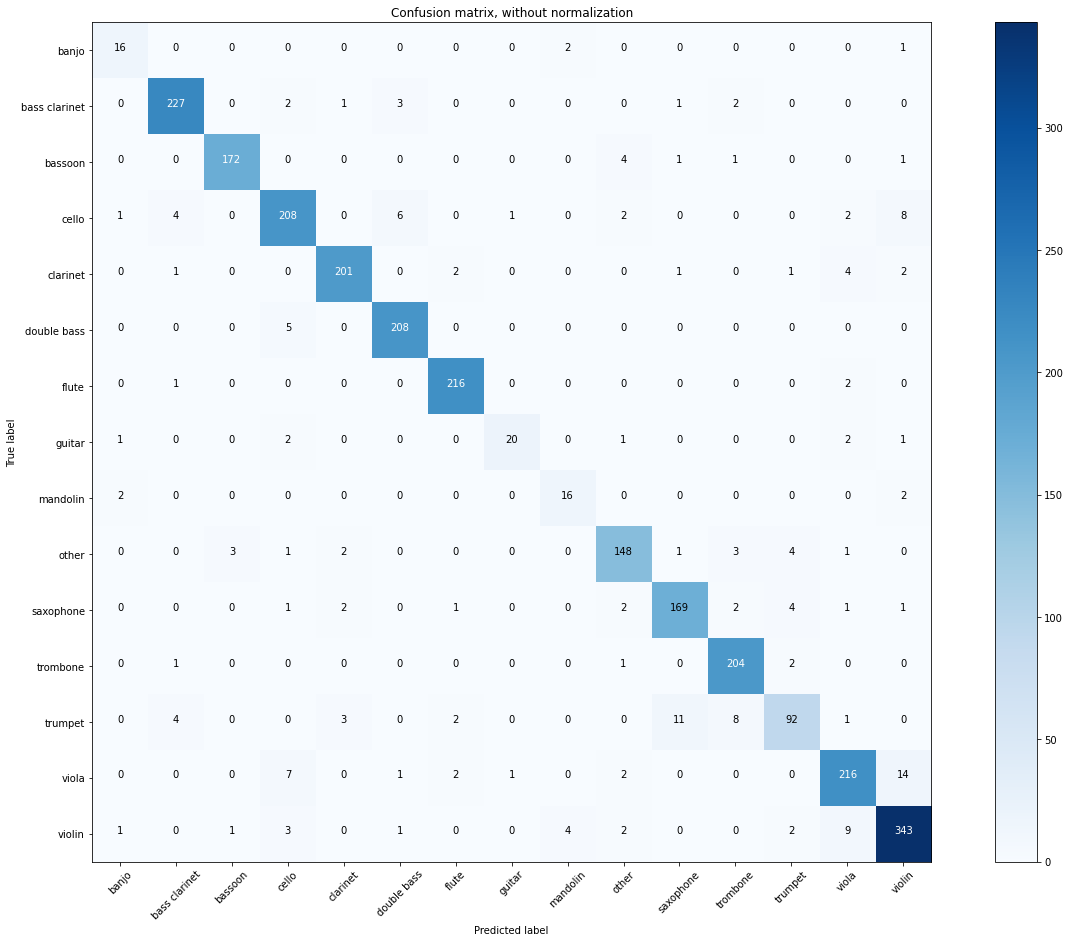

In [38]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,title='Confusion matrix, without normalization')


In [39]:
# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]

In [40]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predicted_labels[wrong_predictions].T)
print(labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print(np.array(files)[test_index[wrong_predictions]])

['other' 'trumpet' 'guitar' 'guitar' 'bass clarinet' 'saxophone'
 'clarinet' 'double bass' 'viola' 'other' 'guitar' 'viola' 'trumpet'
 'double bass' 'violin' 'violin' 'bassoon' 'trumpet' 'violin' 'saxophone'
 'cello' 'violin' 'clarinet' 'trumpet' 'bass clarinet' 'trumpet' 'trumpet'
 'cello' 'saxophone' 'trumpet' 'saxophone' 'other' 'bassoon' 'trumpet'
 'bass clarinet' 'violin' 'viola' 'viola' 'violin' 'trumpet' 'violin'
 'viola' 'double bass' 'cello' 'trumpet' 'saxophone' 'saxophone' 'trumpet'
 'viola' 'other' 'viola' 'clarinet' 'bassoon' 'viola' 'banjo' 'cello'
 'trombone' 'viola' 'mandolin' 'trumpet' 'other' 'viola' 'violin'
 'trumpet' 'guitar' 'saxophone' 'trumpet' 'bass clarinet' 'cello'
 'mandolin' 'other' 'cello' 'violin' 'violin' 'bass clarinet' 'cello'
 'viola' 'saxophone' 'clarinet' 'cello' 'bassoon' 'violin' 'bass clarinet'
 'trombone' 'trumpet' 'cello' 'viola' 'bass clarinet' 'saxophone' 'violin'
 'trumpet' 'cello' 'trumpet' 'viola' 'other' 'viola' 'cello' 'viola'
 'guitar' 